In [17]:
    import matplotlib.pyplot as plt
    import numpy as np
    import astropy.units as u
    from astropy.coordinates import SkyCoord
    from astropy.cosmology import WMAP9 as cosmo
    from astropy.coordinates import Angle, Latitude, Longitude  # Angles
    from matplotlib import gridspec
    from astropy.table import Table
    from astropy.io import fits
    from astropy.wcs import WCS
    from scipy.optimize import curve_fit
    from astropy.table import vstack
    import pandas as pd
    from astropy.table import unique, Table

In [2]:
#cat_puertas = Table.read('catalog.dat')#,format ='ascii.csv', header = True)

In [3]:
#cat_puertas

In [38]:
cat_puertas_2 = Table.read('J_A+A_599_A71_catalog.dat.gz.fits', format ='fits',memmap= True)#,format ='ascii.csv', header = True)

In [39]:
cat_puertas_2

<Table length=209276>
     specObjID       RAdeg    DEdeg   ...     LHa        logSFR  logsSFR
                      deg      deg    ...   1e-07 W    [Msun/yr] [1/Gyr]
       int64        float64  float64  ...   float64     float64  float64
------------------- -------- -------- ... ------------ --------- -------
1399656635961468928  58.6011   0.1814 ... 1.353671e+42    0.8562 -0.1250
1302792405518411776  55.7970   0.9613 ... 9.962668e+40   -0.2802 -1.2247
1302813296239339520  56.0212   0.8985 ... 3.688169e+41    0.3150 -0.9181
1399607982571939840  57.1286   0.8925 ... 4.370279e+39   -1.7362 -1.3852
1398489229004138496  57.5208   0.9748 ... 4.552971e+42    1.4471 -0.1911
1399648389624260608  58.1194   0.8680 ... 4.504744e+41    0.3380 -0.1701
                ...      ...      ... ...          ...       ...     ...
 429065476547569664 346.0486   0.0143 ... 1.417082e+41   -0.1356 -0.9857
1234061939219392512 348.3587   0.0450 ... 5.057205e+40   -0.6390 -0.7909
 764661170496890880 349.9492   0.0866 ... 2.080963e+42    1.1050 -0.5136
1672097201544783872 351.3052   0.1130 ... 9.374455e+39   -1.3871 -1.3098
1231898642541996032 354.1018   0.1867 ... 1.494800e+41   -0.1012 -1.0764
1232912941968287744 351.2173  -0.3065 ... 2.349931e+41    0.0669 -0.5818

(array([  20.,   37.,   40.,  101.,  184.,  328.,  462.,  635., 1260.,
        1894., 1757., 2248., 2594., 2759., 3006., 2749., 2940., 2676.,
        3012., 3003., 3490., 3366., 3247., 3794., 3760., 3838., 3086.,
        3427., 3709., 4361., 4208., 4352., 4006., 4528., 4650., 4305.,
        4654., 4271., 4518., 4109., 4174., 3720., 3492., 2994., 3114.,
        3097., 2914., 2747., 2524., 2841., 2490., 2547., 2719., 2623.,
        2435., 1647., 2397., 2233., 2272., 2108., 2039., 2034., 2131.,
        2030., 1928., 1922., 1807., 1731., 1536., 1502., 1245., 1220.,
        1033., 1198., 1122.,  987.,  995.,  921.,  743.,  762.,  753.,
         719.,  683.,  636.,  636.,  574.,  652.,  416.,  442.,  628.,
         533.,  558.,  533.,  499.,  480.,  464.,  448.,  442.,  400.,
         396.,  347.,  337.,  298.,  274.,  326.,  276.,  276.,  308.,
         304.,  280.]),
 array([0.005     , 0.00695455, 0.00890909, 0.01086364, 0.01281818,
        0.01477273, 0.01672727, 0.01868182, 0.02063636, 

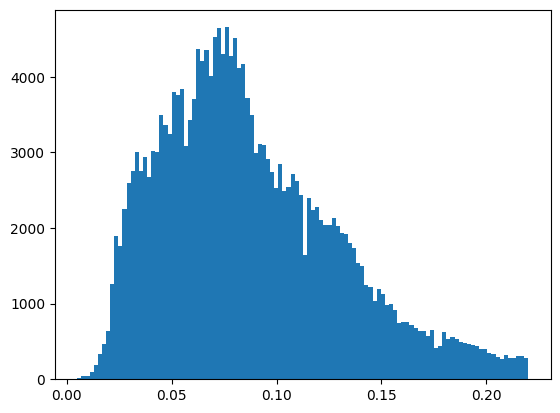

In [40]:
plt.hist(cat_puertas_2['z'],bins = 'auto')

In [41]:
jplus = Table.read('results_joined_all.fitsvacRADEC', format ='fits', memmap = True)#,format ='ascii.csv', header = True)

In [6]:
jplus

<Table length=4950809>
     id      bayes.attenuation.V_B90 ... Quiescent_SF Star_Forming
                       mag           ...                          
  bytes13            float64         ...    int64        int64    
------------ ----------------------- ... ------------ ------------
  100003-100      0.4635663447820948 ...            0            1
100003-10000     0.43606963051861664 ...            0            1
100003-10006      0.5447182940121242 ...            0            1
100003-10008      0.4210941129422756 ...            1            0
100003-10012      0.4579269748028497 ...            1            0
100003-10031      0.4757295638904245 ...            1            0
         ...                     ... ...          ...          ...
  99989-9964     0.38316463605792384 ...            0            1
  99989-9969     0.29788582990098733 ...            0            1
  99989-9970     0.43684810421814046 ...            0            1
  99989-9980      0.5104129017442097 ...            0            1
  99989-9986      0.5028876479525958 ...            0            1
  99989-9987      0.3994171981824978 ...            0            1

In [36]:
def crossmatch_dr3_rm_2(file_dr3,file_rm):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import astropy.units as u
    from astropy.coordinates import SkyCoord
    from astropy.cosmology import WMAP9 as cosmo
    from astropy.coordinates import Angle, Latitude, Longitude  # Angles
    from matplotlib import gridspec
    from astropy.table import Table
    from astropy.io import fits
    from astropy.wcs import WCS
    from scipy.optimize import curve_fit
    from astropy.table import vstack
    import pandas as pd
    from astropy.table import unique, Table
    
    dr3= Table.read(file_dr3,format='fits',memmap=True)
    rm= Table.read(file_rm,format='fits', memmap = True)
    
    ra1,dec1=dr3['RA'],dr3['DEC']

    ra2,dec2 = rm['RAdeg'],rm['DEdeg']


    c = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)

    catalog = SkyCoord(ra=ra2, dec=dec2)

    max_sep = 0.5 * u.arcsec

    idx, d2d, d3d = c.match_to_catalog_3d(catalog)

    sep_constraint = d2d < max_sep

    #c_matches = c[sep_constraint]

    #catalog_matches = catalog[idx[sep_constraint]]
    
    dr3_match = dr3[sep_constraint]
    
    rm_match = rm[idx[sep_constraint]]
    
    dr3_match['z_SDSS'] = rm_match['z']
    dr3_match['logSFR_SDSS'] = rm_match['logSFR']
    dr3_match['logsSFR_SDSS'] = rm_match['logsSFR']
    dr3_match['AHa_SDSS'] = rm_match['AHa']
    dr3_match['Hacorr_SDSS'] = rm_match['Hacorr']
    dr3_match['LHa_SDSS'] = rm_match['LHa']
    
    return dr3_match, rm_match

In [37]:
a,b = crossmatch_dr3_rm_2('results_joined_all.fitsvacRADEC','J_A+A_599_A71_catalog.dat.gz.fits')

In [39]:
a.write('crossmatch_puertas_jplus.fits', format ='fits')

In [38]:
a

<Table length=18907>
     id      bayes.attenuation.V_B90 bayes.attenuation.V_B90_err ... AHa_SDSS Hacorr_SDSS    LHa_SDSS  
                       mag                       mag             ...   mag      mW / m2      1e-07 W   
  bytes13            float64                   float64           ... float64    float64      float64   
------------ ----------------------- --------------------------- ... -------- ------------ ------------
100193-12499     0.47558595309350543          0.3280800017130215 ...   1.2233 3.037290e-14 4.295298e+41
100193-17485      0.4272533556843793          0.2808564528816074 ...   0.5312 1.223553e-14 8.932394e+40
100193-18818      0.3864678630491244         0.31242233141937614 ...   0.9100 1.471723e-14 4.340765e+41
100193-19165     0.46189884605602743         0.28485269271252367 ...   1.1193 7.813193e-15 1.112096e+41
100193-19184      0.2721466753257167          0.2439694602945278 ...   0.0803 4.477324e-15 3.943175e+40
100193-24299      0.6551711144718317         0.31297083696710365 ...   1.5546 2.078564e-13 8.251820e+42
100193-25106      0.5390783193027213         0.28369591912462094 ...   0.3163 1.108917e-14 1.565329e+41
100193-27415        0.50247049254012         0.33693274512923393 ...   1.0110 7.624694e-15 8.404382e+40
100193-27441     0.47974488737156984          0.3320301245228745 ...   1.5484 1.330713e-14 1.365868e+42
100205-12405      0.4378756270702823          0.2927496588422491 ...   0.1670 1.073988e-14 1.217807e+41
100205-19163      0.6088982889734437          0.3149393811136953 ...   1.0207 4.836889e-14 5.444092e+41
100205-21266     0.47382887207242946          0.2824069064302911 ...   0.5289 3.769226e-14 3.452904e+41
100205-21955      0.3979881166245154          0.2819074028128503 ...   1.3861 1.347805e-14 1.791657e+41
         ...                     ...                         ... ...      ...          ...          ...
   98762-691      0.3137008590135893          0.2901735039045117 ...   0.7257 4.918753e-15 2.567092e+41
   98762-751      0.4152962958607906          0.3085528759033488 ...   0.8256 2.410542e-15 3.197921e+41
   98762-832     0.44926876068722876          0.3051831827512135 ...   1.3085 6.487943e-14 2.255976e+42
  98777-1014     0.46761109212454244         0.28034937103274676 ...   0.8509 1.337049e-14 1.688579e+41
  98777-1068      0.6189348008855561          0.2980601774964673 ...   0.6453 2.071393e-14 2.048866e+41
   98777-145      0.6018796812953526          0.2861129929333187 ...   0.5593 1.301439e-14 2.076328e+41
   98777-168      0.3210839836017194          0.2671719469496044 ...   0.1075 2.507860e-15 3.603779e+40
   98777-237      0.5110452323899316         0.33054761653898707 ...   1.2828 4.011588e-14 6.332460e+41
   98777-285      0.5472004059603257          0.3178058247713937 ...   0.4163 9.975511e-15 4.639203e+41
   98777-472      0.5134757219080356          0.3027641348100676 ...   0.4623 7.243255e-15 1.046636e+41
   98777-582     0.33103140454432367          0.3322549622130296 ...   0.3353 1.079667e-14 5.169918e+41
   98777-728     0.38354401055729287         0.31673404493699253 ...   0.0000 1.759952e-15 1.233435e+41
   98777-775       0.553035730823439         0.32509202807408183 ...   1.1362 9.187269e-15 6.838694e+41
   98777-963      0.3849276444442624         0.29634698879786014 ...   0.2169 7.178226e-15 1.168999e+41

(array([4857., 3676., 3123., 1487.,  929.,  634.,  414.,  149.,   66.,
          54.]),
 array([0.05      , 0.08      , 0.11      , 0.14      , 0.17      ,
        0.2       , 0.22999999, 0.25999999, 0.28999999, 0.31999999,
        0.34999999]),
 <BarContainer object of 10 artists>)

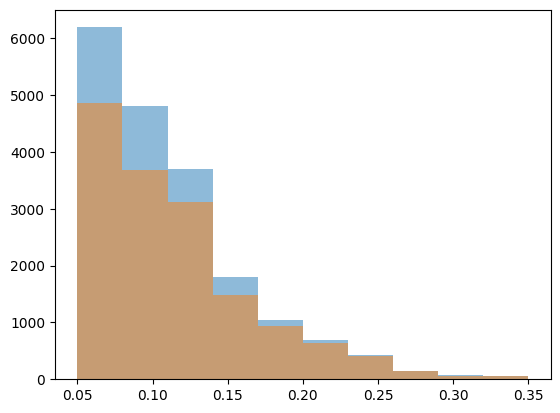

In [5]:
plt.hist(a['redshift'], alpha = 0.5)
plt.hist(a[a['Star_Forming']==1.0]['redshift'],alpha = 0.5)

In [6]:
b

<Table length=18907>
     specObjID       RAdeg    DEdeg      z    petroR50r    Hacorr      AHa       LHa        logSFR  logsSFR
                      deg      deg              arcsec    mW / m2      mag     1e-07 W    [Msun/yr] [1/Gyr]
       int64        float64  float64  float64  float64    float64    float64   float64     float64  float64
------------------- -------- -------- ------- --------- ------------ ------- ------------ --------- -------
 826436132580386816 330.1961  11.4783  0.0759    1.3131 3.037290e-14  1.2233 4.295298e+41    0.3744 -0.7872
 827614264238827520 331.2328  11.7366  0.0553    2.0930 1.223553e-14  0.5312 8.932394e+40   -0.3650 -0.8699
 826441905016432640 330.7137  11.8053  0.1073    2.2786 1.471723e-14  0.9100 4.340765e+41    0.4225 -1.1786
 827617287895803904 331.0225  11.9737  0.0762    1.9069 7.813193e-15  1.1193 1.112096e+41   -0.1712 -1.7499
 827618662285338624 330.9364  11.9745  0.0606    3.2337 4.477324e-15  0.0803 3.943175e+40   -0.7201 -1.2246
 826441630138525696 330.4654  12.0992  0.1232    2.4844 2.078564e-13  1.5546 8.251820e+42    1.7609 -0.3814
 826430085266434048 330.8194  12.0776  0.0759    3.0553 1.108917e-14  0.3163 1.565329e+41   -0.0815 -1.0539
 826453724766431232 330.3772  11.9213  0.0674    1.8369 7.624694e-15  1.0110 8.404382e+40   -0.3521 -1.3189
 826440255748990976 330.5450  11.9248  0.1901    1.6362 1.330713e-14  1.5484 1.365868e+42    0.9674 -1.0669
 827560113291159552 332.4856  11.5728  0.0683    2.9030 1.073988e-14  0.1670 1.217807e+41   -0.2110 -0.9496
 827573582308599808 332.2007  11.8120  0.0681    2.2937 4.836889e-14  1.0207 5.444092e+41    0.4795 -0.7053
 827582103523715072 332.4326  12.2077  0.0617    1.9985 3.769226e-14  0.5289 3.452904e+41    0.2425 -0.5066
 826421289173411840 331.4846  12.1861  0.0737    4.4034 1.347805e-14  1.3861 1.791657e+41   -0.0286 -0.9366
 827582653279528960 332.1892  12.1470  0.0811    1.9936 2.049905e-14  1.5675 3.334611e+41    0.2696 -0.9462
 827562862070228992 332.2737  12.0571  0.0806    1.4214 1.559621e-14  0.5264 2.502018e+41    0.1053 -0.6750
 827536748669069312 332.9352  11.6028  0.0687    1.5596 5.179360e-14  1.1690 5.941745e+41    0.5480 -0.9470
 827537023546976256 332.9177  11.6738  0.0619    1.8433 5.132940e-14  0.4571 4.730544e+41    0.4033 -0.6178
 828741258657687552 333.3851  11.8411  0.1199    2.1428 7.704842e-14  0.9561 2.884358e+42    1.2512 -0.4095
 828717894035597312 333.8512  11.8410  0.1318    2.5230 4.627376e-15  0.1020 2.124149e+41    0.0899 -1.2917
 828729164029782016 333.7380  11.7828  0.1510    2.1008 5.047895e-14  1.6698 3.115812e+42    1.3028 -0.5265
 827566710360926208 333.0690  12.2423  0.1680    1.2321 1.434027e-14  0.9823 1.119769e+42    0.8610 -0.9930
 828733836954200064 333.6267  12.1259  0.0801    2.1993 7.336598e-14  1.0133 1.162549e+42    0.8236 -0.5121
 827554890610927616 333.0724  12.0919  0.0690    2.3293 1.207467e-14  0.6182 1.395501e+41   -0.1479 -0.9327
                ...      ...      ...     ...       ...          ...     ...          ...       ...     ...
1750887110228862976  29.2084   1.2099  0.0825    1.7014 2.065739e-15  0.0000 3.476839e+40   -0.7675 -1.3622
 453841322818693120  29.0510   1.2103  0.1357    0.7733 3.828037e-15  0.3735 1.873306e+41   -0.0407 -0.5780
1750873641211422720  29.1003   1.2230  0.0821    1.5434 6.057149e-15  0.8590 1.009168e+41   -0.2914 -1.0447
1750864845118400512  28.9875   1.2269  0.0822    1.3347 2.977035e-15  0.5862 4.980888e+40   -0.6214 -1.0915
 452755278899734528  28.0792   1.2229  0.0599    2.2637 1.547633e-14  1.1498 1.329897e+41   -0.1138 -1.4920
1209371855241111552  32.0545   1.2353  0.1760    0.8356 1.422505e-15  0.2445 1.230573e+41   -0.1908 -1.1092
1752056998200895488  32.2484   1.2363  0.0320    2.0853 2.770332e-15  0.0000 6.522190e+39   -1.5671 -1.1383
 790537352039655424  32.9540   1.1742  0.1984    1.1509 5.338728e-15  0.5981 6.024406e+41    0.5383 -0.7995
1208183003461740544  32.8522   1.1991  0.1405    0.7384 2.474559e-15  0.9863 1.305621e+41  

(array([ 298., 1423., 3966., 3645., 3254., 2693., 1714.,  795.,  679.,
         440.]),
 array([0.0183 , 0.03847, 0.05864, 0.07881, 0.09898, 0.11915, 0.13932,
        0.15949, 0.17966, 0.19983, 0.22   ]),
 <BarContainer object of 10 artists>)

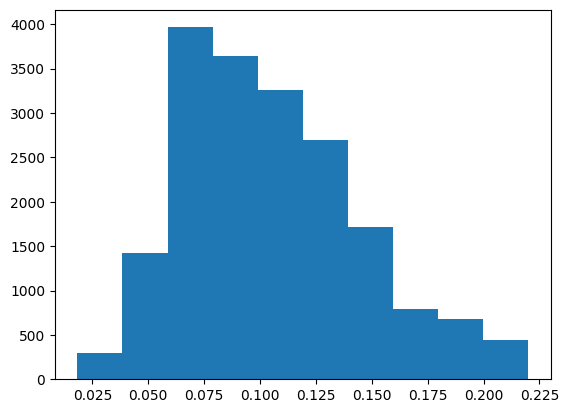

In [7]:
plt.hist(b['z'])

In [60]:
#a = a[a['Star_Forming']==1.]

In [61]:
#a

<Table length=15389>
     id      bayes.attenuation.V_B90 ... Hacorr_SDSS    LHa_SDSS  
                       mag           ...   mW / m2      1e-07 W   
  bytes13            float64         ...   float64      float64   
------------ ----------------------- ... ------------ ------------
100193-17485      0.4272533556843793 ... 1.223553e-14 8.932394e+40
100193-19184      0.2721466753257167 ... 4.477324e-15 3.943175e+40
100193-24299      0.6551711144718317 ... 2.078564e-13 8.251820e+42
100193-25106      0.5390783193027213 ... 1.108917e-14 1.565329e+41
100193-27415        0.50247049254012 ... 7.624694e-15 8.404382e+40
100193-27441     0.47974488737156984 ... 1.330713e-14 1.365868e+42
         ...                     ... ...          ...          ...
   98777-285      0.5472004059603257 ... 9.975511e-15 4.639203e+41
   98777-472      0.5134757219080356 ... 7.243255e-15 1.046636e+41
   98777-582     0.33103140454432367 ... 1.079667e-14 5.169918e+41
   98777-728     0.38354401055729287 ... 1.759952e-15 1.233435e+41
   98777-775       0.553035730823439 ... 9.187269e-15 6.838694e+41
   98777-963      0.3849276444442624 ... 7.178226e-15 1.168999e+41

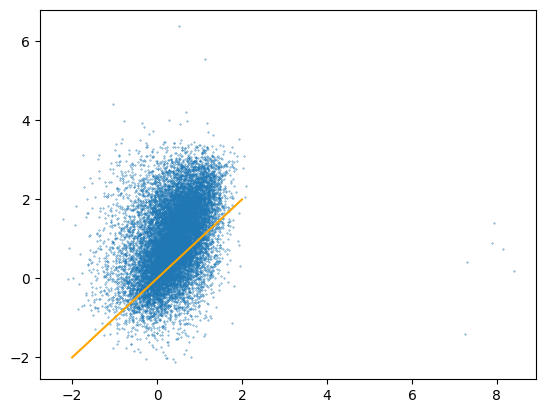

In [62]:
plt.scatter(a['logSFR_SDSS'], np.log(a['bayes.sfh.sfr']),s=0.1)
x=np.linspace(-2,2,100)
y = x 
plt.plot(x,y, color ='orange')

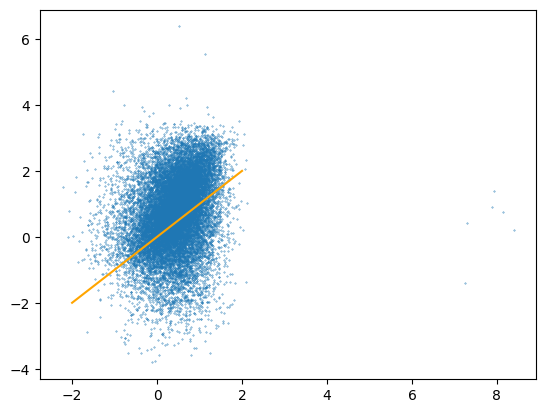

In [43]:
plt.scatter(a['logSFR_SDSS'], np.log(a['bayes.sfh.sfr']),s=0.1)
x=np.linspace(-2,2,100)
y = x 
plt.plot(x,y, color ='orange')

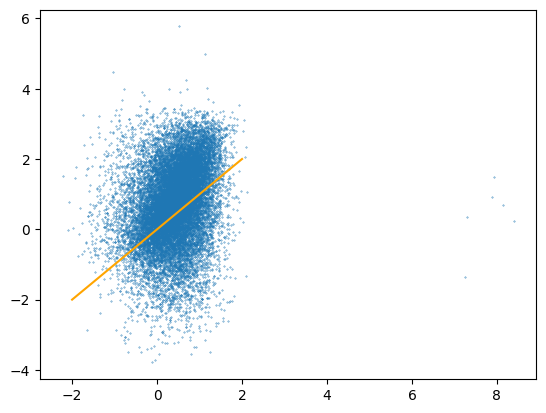

In [46]:
plt.scatter(a['logSFR_SDSS'], np.log(a['bayes.sfh.sfr10Myrs']),s=0.1)
x=np.linspace(-2,2,100)
y = x 
plt.plot(x,y, color ='orange')

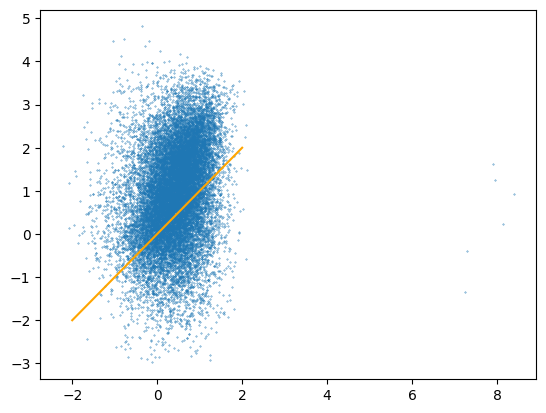

In [47]:
plt.scatter(a['logSFR_SDSS'], np.log(a['bayes.sfh.sfr100Myrs']),s=0.1)
x=np.linspace(-2,2,100)
y = x 
plt.plot(x,y, color ='orange')

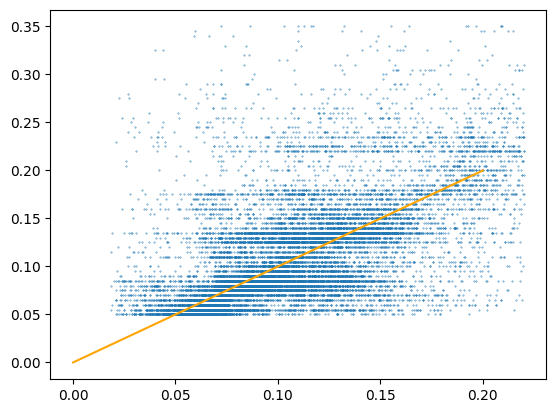

In [51]:
plt.scatter(a['z_SDSS'], (a['redshift']),s=0.1)
x1=np.linspace(0,0.2,100)
y1 = x1 
plt.plot(x1,y1, color ='orange')

In [72]:
a

<Table length=15389>
     id      bayes.attenuation.V_B90 ... Hacorr_SDSS    LHa_SDSS  
                       mag           ...   mW / m2      1e-07 W   
  bytes13            float64         ...   float64      float64   
------------ ----------------------- ... ------------ ------------
100193-17485      0.4272533556843793 ... 1.223553e-14 8.932394e+40
100193-19184      0.2721466753257167 ... 4.477324e-15 3.943175e+40
100193-24299      0.6551711144718317 ... 2.078564e-13 8.251820e+42
100193-25106      0.5390783193027213 ... 1.108917e-14 1.565329e+41
100193-27415        0.50247049254012 ... 7.624694e-15 8.404382e+40
100193-27441     0.47974488737156984 ... 1.330713e-14 1.365868e+42
         ...                     ... ...          ...          ...
   98777-285      0.5472004059603257 ... 9.975511e-15 4.639203e+41
   98777-472      0.5134757219080356 ... 7.243255e-15 1.046636e+41
   98777-582     0.33103140454432367 ... 1.079667e-14 5.169918e+41
   98777-728     0.38354401055729287 ... 1.759952e-15 1.233435e+41
   98777-775       0.553035730823439 ... 9.187269e-15 6.838694e+41
   98777-963      0.3849276444442624 ... 7.178226e-15 1.168999e+41

In [11]:
def plot_SDSS_jplus(results_cigale2):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import NullFormatter, MaxNLocator
    from numpy import linspace
    import numpy as np
    #np.random.seed(12345)
    import matplotlib.pyplot as plt
    from scipy import stats

    flag=2.
    plt.ion()

     # Define the x and y data 
    #Retrieve only those in the main sequence
    results_cigale2 = results_cigale2[results_cigale2['Star-Forming']==1.0]
    if flag==0.:
        SFR_jplus=np.log10(results_cigale2['bayes.sfh.sfr100Myrs'].data)
    elif flag==1.:
        SFR_jplus=np.log10(results_cigale2['bayes.sfh.sfr10Myrs'].data)
    elif flag==2.:
        SFR_jplus=np.log10(results_cigale2['bayes.sfh.sfr'].data)

    ##SFR_lim=SFR[(SFR<3)&(SFR>-4)]
    SFR_lim= SFR_jplus
    #SFR_lim_inst = np.log10(results_cigale2['bayes.sfh.sfr'].data)
    #SFR_lim_inst=SFR_lim_inst[(SFR<3)&(SFR>-4)]

    y=SFR_lim #-1.00
    #y = SFR

    sfr_sdss=(results_cigale2['logSFR_SDSS'].data)
    #logmass=logmass[(SFR<3)&(SFR>-4)]

    x=sfr_sdss
    # Set up default x and y limits
    xlims = [min(x),max(x)]
    ylims = [min(y),max(y)]
    #ylims = [-4.5,3]

    # Set up your x and y labels
    xlabel = '$\mathrm{Your\\ X\\ Label}$'
    ylabel = '$\mathrm{Your\\ Y\\ Label}$'

    # Define the locations for the axes
    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width+0.02

    # Set up the geometry of the three plots
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram




    fontsize_num = 20

    # Set up the size of the figure
    fig = plt.figure(1, figsize=(11,11))
    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axTemperature.set_xlabel('$\log(M/M_{\odot})$',fontsize = fontsize_num)
    axTemperature.set_ylabel('log(SFR) [$M_{\odot}/yr$]',fontsize = fontsize_num)
    axTemperature.tick_params(axis='both', which='major',labelsize = fontsize_num)
    axTemperature.tick_params(axis='both', which='minor',labelsize = fontsize_num)
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram
    axHistx.tick_params(axis='both', which='major',labelsize = fontsize_num)
    axHisty.tick_params(axis='both', which='major',labelsize = fontsize_num)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # Find the min/max of the data
    xmin = min(x)
    xmax = max(x)
    ymin = min(y)
    ymax = max(y)

    # Make the 'main' temperature plot
    # Define the number of bins
    nxbins = 100
    nybins = 100
    nbins = 25#2*(len(y))**(1/3.)

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = 1.0*(xmax - 0)/(1.0*ymax - 0)

    #H, yedges, xedges = np.histogram2d(sSFR_lim, logmass, bins=nbins)
    H, yedges,xedges = np.histogram2d(y,x,bins=(ybins,xbins))#,weights=SFR_lim_inst)
    X = xcenter
    Y = ycenter
    Z = H

    # Plot the temperature data
    #cax = (axTemperature.imshow(H, extent=[xmin,xmax,ymin,ymax],
     #      interpolation='nearest', origin='lower',aspect=aspectratio))

    ymedian=np.median(y) 
    ymean=np.mean(y)

    cmap = plt.cm.jet
    cmap.set_bad('w', 1.)

    cmap_multicolor = plt.cm.jet
    cmap_multicolor.set_bad('w', 1.)    

    #cax = (axTemperature.imshow(np.log10(H),origin='lower',
     #          extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
      #         aspect='auto', interpolation='nearest', cmap=cmap))

    cax = (axTemperature.imshow(np.log10(H),origin='lower',

               aspect='auto', interpolation='nearest', cmap=cmap,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]))#,extent=[7,13,-13,-8]))

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)

    #a,b=np.hist(x, bins=xbins)      
    axHistx.hist(x, bins=xbins, color = 'blue')#,range=(7.,13.))
    axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'red')#, density = True)#,range=(-13.,-8.))

    
    x=np.linspace(-2,2,100)
    y = x 
    axTemperature.plot(x,y,color ='green')
    #axHisty.axhline(ymedian)
    #axHisty.axhline(ymean)

    #Fit

    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from scipy.optimize import curve_fit
    from scipy.interpolate import UnivariateSpline

    #y_to_fit,x_to_fit=np.histogram(y,bins=ybins)

    x_to_fit,y_to_fit=np.histogram(y,bins=ybins, density=True)

    y_to_fit= (y_to_fit[1:]+y_to_fit[:-1])/2


    def gauss(x, mu, sigma, A):
        return A*np.exp(-(x-mu)**2/2/sigma**2)

    def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
        return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

    expected = (-8.5,0.1,3000,-11,0.5,4000)

    #params, cov = curve_fit(bimodal, y_to_fit, x_to_fit,expected)

    #sigma=np.sqrt(np.diag(cov))

    y_fit = np.linspace(y_to_fit.min(), y_to_fit.max(),100)

    density = stats.gaussian_kde(y)
    density.covariance_factor = lambda : .1
    density._compute_covariance()

    axTemperature.legend(fontsize=10)
    plt.draw()

    # Save to a File
    filename = 'SFR_low_range_extinction_reduced_chisquare_all_oliver_and_coil_02_03_xi_square_10_75_relerr_0_5'
    #plt.savefig(filename+str(oddsmin)+ 'mag_lim'+str(maglimr) + 'flag_' + str(flag)+str(zmin)+str(zmax)+'_dex1_randz.png',format = 'png', transparent=True, facecolor='white')

In [14]:
#plot_SDSS_jplus(a)

In [12]:
def plot_SDSS_jplus(results_cigale2,flag):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import NullFormatter, MaxNLocator
    from numpy import linspace
    import numpy as np
    #np.random.seed(12345)
    import matplotlib.pyplot as plt
    from scipy import stats

    #flag=1.
    plt.ion()

     # Define the x and y data 
    #Retrieve only those in the main sequence
    results_cigale2 = results_cigale2[results_cigale2['Star_Forming']==1.0]
    if flag==0.:
        SFR_jplus=np.log10(results_cigale2['bayes.sfh.sfr100Myrs'].data)
    elif flag==1.:
        SFR_jplus=np.log10(results_cigale2['bayes.sfh.sfr10Myrs'].data)
    elif flag==2.:
        SFR_jplus=np.log10(results_cigale2['bayes.sfh.sfr'].data)

    ##SFR_lim=SFR[(SFR<3)&(SFR>-4)]
    SFR_lim= SFR_jplus
    #SFR_lim_inst = np.log10(results_cigale2['bayes.sfh.sfr'].data)
    #SFR_lim_inst=SFR_lim_inst[(SFR<3)&(SFR>-4)]

    y=SFR_lim #-1.00
    #y = SFR

    sfr_sdss=(results_cigale2['logSFR_SDSS'].data)
    #logmass=logmass[(SFR<3)&(SFR>-4)]

    x=sfr_sdss
    # Set up default x and y limits
    xlims = [min(x),max(x)]
    ylims = [min(y),max(y)]
    #ylims = [-4.5,3]

    # Set up your x and y labels
    xlabel = '$\mathrm{Your\\ X\\ Label}$'
    ylabel = '$\mathrm{Your\\ Y\\ Label}$'

    # Define the locations for the axes
    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width+0.02

    # Set up the geometry of the three plots
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram




    fontsize_num = 20

    # Set up the size of the figure
    fig = plt.figure(1, figsize=(11,11))
    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axTemperature.set_xlabel('log(SFR) Puertas et al [$M_{\odot}/yr$]',fontsize = fontsize_num)
    if flag ==0.:
        axTemperature.set_ylabel('log(SFR100Myr) CIGALE [$M_{\odot}/yr$]',fontsize = fontsize_num)
    elif flag ==1.:
        axTemperature.set_ylabel('log(SFR10Myr) CIGALE [$M_{\odot}/yr$]',fontsize = fontsize_num)
    elif flag ==2.:
        axTemperature.set_ylabel('log(SFR) CIGALE [$M_{\odot}/yr$]',fontsize = fontsize_num)
    axTemperature.tick_params(axis='both', which='major',labelsize = fontsize_num)
    axTemperature.tick_params(axis='both', which='minor',labelsize = fontsize_num)
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram
    axHistx.tick_params(axis='both', which='major',labelsize = fontsize_num)
    axHisty.tick_params(axis='both', which='major',labelsize = fontsize_num)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # Find the min/max of the data
    xmin = min(x)
    xmax = max(x)
    ymin = min(y)
    ymax = max(y)

    # Make the 'main' temperature plot
    # Define the number of bins
    nxbins = 50
    nybins = 50
    nbins = 25#2*(len(y))**(1/3.)

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = 1.0*(xmax - 0)/(1.0*ymax - 0)

    #H, yedges, xedges = np.histogram2d(sSFR_lim, logmass, bins=nbins)
    H, yedges,xedges = np.histogram2d(y,x,bins=(ybins,xbins))#,weights=SFR_lim_inst)
    X = xcenter
    Y = ycenter
    Z = H

    # Plot the temperature data
    #cax = (axTemperature.imshow(H, extent=[xmin,xmax,ymin,ymax],
     #      interpolation='nearest', origin='lower',aspect=aspectratio))

    ymedian=np.median(y) 
    ymean=np.mean(y)

    cmap = plt.cm.jet
    cmap.set_bad('w', 1.)

    cmap_multicolor = plt.cm.jet
    cmap_multicolor.set_bad('w', 1.)    

    #cax = (axTemperature.imshow(np.log10(H),origin='lower',
     #          extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
      #         aspect='auto', interpolation='nearest', cmap=cmap))

    cax = (axTemperature.imshow(np.log10(H),origin='lower',

               aspect='auto', interpolation='nearest', cmap=cmap,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]))#,extent=[7,13,-13,-8]))

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)

    #a,b=np.hist(x, bins=xbins)      
    axHistx.hist(x, bins=xbins, color = 'blue')#,range=(7.,13.))
    axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'red')#, density = True)#,range=(-13.,-8.))

    
    x=np.linspace(-2,2,100)
    y = x 
    axTemperature.plot(x,y,color ='green')
    #axHisty.axhline(ymedian)
    #axHisty.axhline(ymean)

    #Fit

    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from scipy.optimize import curve_fit
    from scipy.interpolate import UnivariateSpline

    #y_to_fit,x_to_fit=np.histogram(y,bins=ybins)

    x_to_fit,y_to_fit=np.histogram(y,bins=ybins, density=True)

    y_to_fit= (y_to_fit[1:]+y_to_fit[:-1])/2


    def gauss(x, mu, sigma, A):
        return A*np.exp(-(x-mu)**2/2/sigma**2)

    def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
        return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

    expected = (-8.5,0.1,3000,-11,0.5,4000)

    #params, cov = curve_fit(bimodal, y_to_fit, x_to_fit,expected)

    #sigma=np.sqrt(np.diag(cov))

    y_fit = np.linspace(y_to_fit.min(), y_to_fit.max(),100)

    density = stats.gaussian_kde(y)
    density.covariance_factor = lambda : .1
    density._compute_covariance()
    axTemperature.set_xlim(-2,2)
    axTemperature.set_ylim(-1,2)
    axTemperature.legend(fontsize=10)
    plt.draw()

    # Save to a File
    filename = 'SFR_low_range_extinction_reduced_chisquare_all_oliver_and_coil_02_03_xi_square_10_75_relerr_0_5'
    #plt.savefig(filename+str(oddsmin)+ 'mag_lim'+str(maglimr) + 'flag_' + str(flag)+str(zmin)+str(zmax)+'_dex1_randz.png',format = 'png', transparent=True, facecolor='white')

In [13]:
#plot_SDSS_jplus(a)

/tmp/ipykernel_5812/3583752949.py:124: RuntimeWarning: divide by zero encountered in log10
  cax = (axTemperature.imshow(np.log10(H),origin='lower',
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


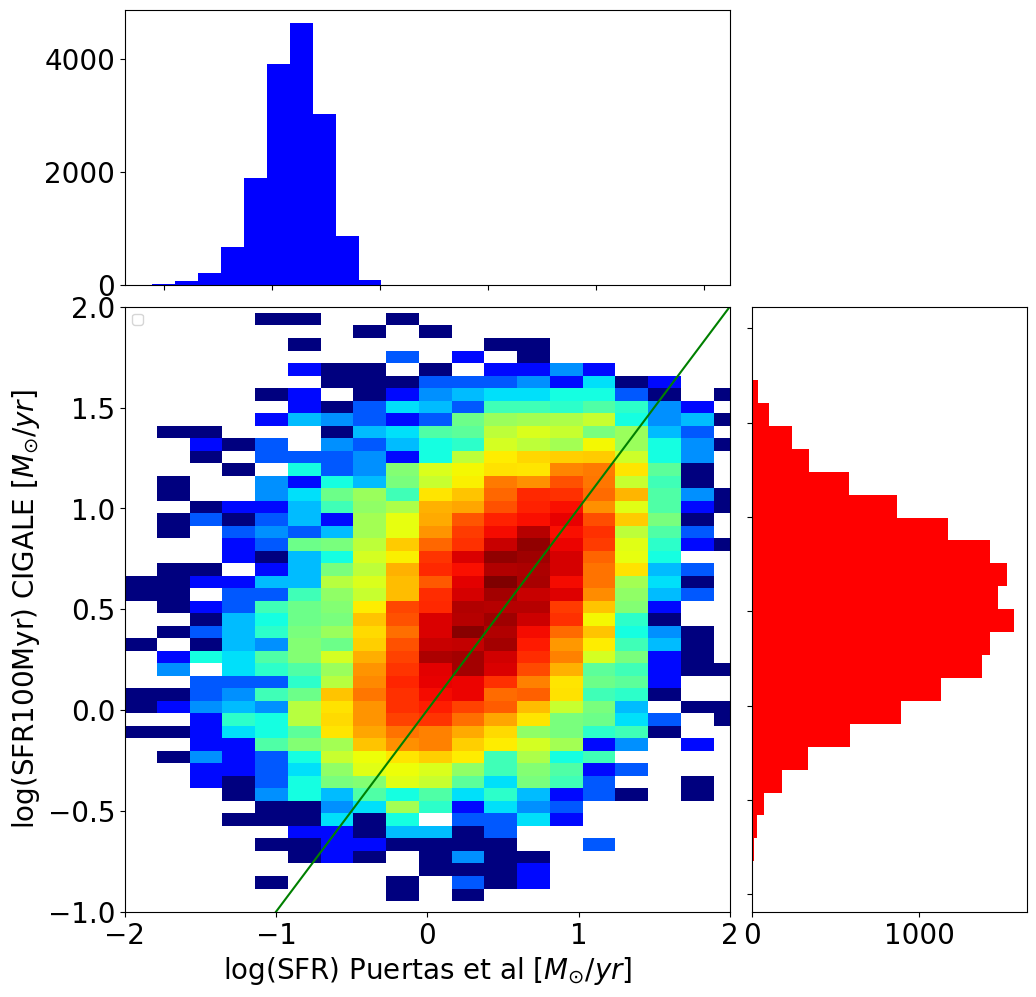

In [14]:
plot_SDSS_jplus(a,0)

In [40]:
def plot_subs_sfr(flag):
    from scipy.stats import norm 
    gal =Table.read('crossmatch_puertas_jplus.fits',format ='fits', memmap = True)
    gal = gal[gal['Star_Forming']==1.0]
    if flag==0.:
        SFR_jplus=np.log10(gal['bayes.sfh.sfr100Myrs'].data)
    elif flag==1.:
        SFR_jplus=np.log10(gal['bayes.sfh.sfr10Myrs'].data)
    elif flag==2.:
        SFR_jplus=np.log10(gal['bayes.sfh.sfr'].data)
    
    data= gal['logSFR_SDSS']+np.log10(0.943) - SFR_jplus
    plt.hist(data, bins = 'auto', density =True,histtype=u'step',linewidth = 2)
    mu, std = norm.fit(data[~np.isnan(data)]) 
    xmin, xmax = plt.xlim() 
    x = np.linspace(xmin,xmax, 1000) 
    p = norm.pdf(x, mu, std) 
    plt.plot(x, p, 'k', linewidth=2, label ='gaussian fit', ls = '-.') 
    median_dif =  np.nanmedian(data)
#     plt.axvline(x = median_dif, color ='orange', label ='median = %4.2f'%(median_dif ))
#     plt.axvline(x = mu , color ='green', label = 'mu = %4.2f'%(mu))
#     plt.axvline(x = mu + std, color ='pink')
#     plt.axvline(x = mu -std, color ='pink', label ='sigma = %4.2f'%((std)))
#     plt.axvline (x = mu + 2.35*std/2, color ='red')
#     plt.axvline (x = mu - 2.35*std/2, color = 'red', label = 'FWHM = %4.2f'%(2.35*std))
    print('median = '+str(median_dif))
    print('mu = ' + str(mu))
    print('sigma =' +str(std))
    print('FWHM = '+str(2.35*std))
    if flag ==0.:
        plt.xlabel('$\log(SFR) \ Duarte\_Puertas \ - \ log(SFR100Myr) \ CIGALE$')
    elif flag == 1.0:
        plt.xlabel('$\log(SFR) \ Duarte\_Puertas \ - \ log(SFR10Myr) \ CIGALE$')
    elif flag == 2.0:
        plt.xlabel('$\log(SFR) \ Duarte\_Puertas \ - \ log(SFR) \ CIGALE$')
    plt.xlim(-2,2)
    plt.xlabel('$log(R_{SFR})$',size =14)
    plt.ylabel('Density',size =14)
    #plt.legend()
    #'%f*x%f'%(a_fit,b_fit)
    plt.savefig('histogram_subs_logs_SFR_Puertas.png',format = 'png', transparent=True, facecolor='white')
    np.savetxt('SFR_difference_log.txt', data[~np.isnan(data)], fmt='%.8f')

median = -0.02759549529013061
mu = -0.062893288951489
sigma =0.5639734155018176
FWHM = 1.3253375264292713


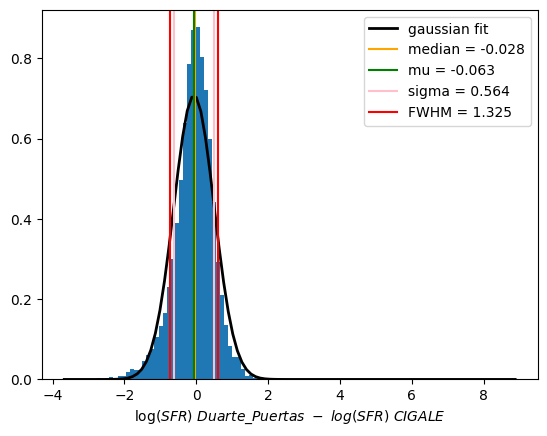

In [70]:
plot_subs_sfr(a,2.)

median = -0.05607789984916117
mu = -0.09070412977427023
sigma =0.5645480866317086
FWHM = 1.3266880035845154


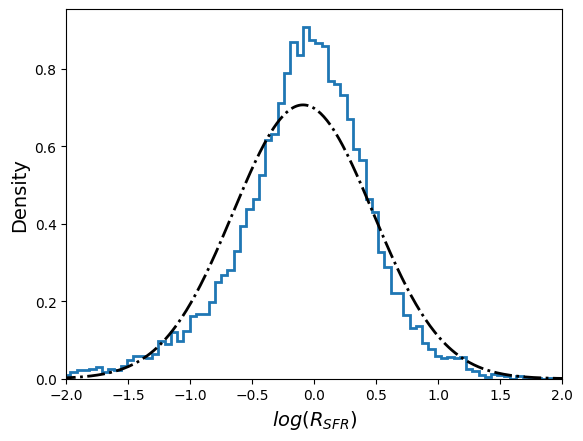

In [41]:
plot_subs_sfr(1.)

In [96]:
def plot_subs_sfr_gfit(flag):
    from scipy.stats import norm 
    gal =Table.read('crossmatch_puertas_jplus.fits',format ='fits', memmap = True)
    
    gal = gal[gal['Star_Forming']==1.0]
    if flag==0.:
        SFR_jplus=np.log10(gal['bayes.sfh.sfr100Myrs'].data)
    elif flag==1.:
        SFR_jplus=np.log10(gal['bayes.sfh.sfr10Myrs'].data)
    elif flag==2.:
        SFR_jplus=np.log10(gal['bayes.sfh.sfr'].data)
    
    data= gal['logSFR_SDSS']+np.log10(0.943) - SFR_jplus
    gf = gfit.gfit()
    print(np.array(data.data))
    stellarmass = np.array(data.data)
    gf.gfit(stellarmass,nbin = 100, xlabel = '\Delta SFR', plot=1, xmin = -2, xmax = 2)
    #plt.legend()
    #'%f*x%f'%(a_fit,b_fit)
    plt.savefig('histogram_subs_logs_SFR_Puertas_gfit.png',format = 'png', transparent=True,dpi =200, facecolor='white')
    #np.savetxt('SFR_difference_log.txt', data[~np.isnan(data)], fmt='%.8f')

[-1.16705686 -1.88979819  0.49573248 ... -0.7585775  -0.41548023
 -0.40937449]
mu = -0.034139; sigma = 0.445491; C = 0.852274


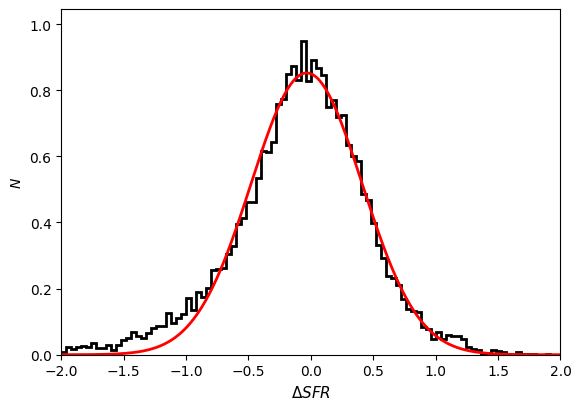

In [97]:
plot_subs_sfr_gfit(1.)

In [71]:
plot_subs_sfr(a,1.)

median = -0.030589592586489522
mu = -0.06521582251159858
sigma =0.5645480866317086
FWHM = 1.3266880035845154


median = -0.10974640375175104
mu = -0.13967178938702357
sigma =0.5878264855621632
FWHM = 1.3813922410710837


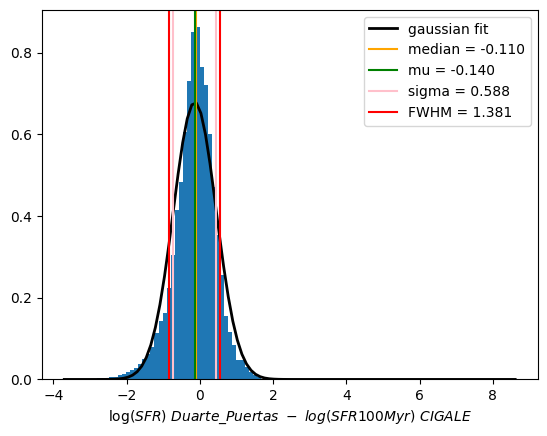

In [72]:
plot_subs_sfr(a,0.)

In [107]:
def plot_subs_stellar_mass(gal):
    from scipy.stats import norm 
    gal =Table.read('crossmatch_puertas_jplus.fits',format ='fits', memmap = True)
    gal = gal[gal['Star_Forming']==1.0]
#     if flag==0.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr100Myrs'].data)
#     elif flag==1.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr10Myrs'].data)
#     elif flag==2.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr'].data)
    mass_jplus = np.log10(gal['bayes.stellar.m_star'])
    mass_SDSS = gal['logSFR_SDSS']+np.log10(0.943)-gal['logsSFR_SDSS']+9 #+0.04 #Kroupa first, then
    data= mass_SDSS - mass_jplus
    plt.hist(data, bins = 'auto', density =True,histtype=u'step',linewidth = 2)
    mu, std = norm.fit(data[~np.isnan(data)]) 
    xmin, xmax = plt.xlim() 
    x = np.linspace(xmin,xmax, 100) 
    p = norm.pdf(x, mu, std) 
    plt.plot(x, p, 'k', linewidth=2, label ='gaussian fit', ls ='--') 
    median_dif =  np.nanmedian(data)
    #plt.axvline(x = median_dif, color ='orange', label ='median = %4.2f'%(median_dif ),ls = '-.')
#     plt.axvline(x = mu , color ='green', label = 'mu = %4.2f'%(mu))
#     plt.axvline(x = mu + std, color ='pink')
#     plt.axvline(x = mu -std, color ='pink', label ='sigma = %4.2f'%((std)))
#     plt.axvline (x = mu + 2.35*std/2, color ='red')
#     plt.axvline (x = mu - 2.35*std/2, color = 'red', label = 'FWHM = %4.2f'%(2.35*std))
    print('median = '+str(median_dif))
    print('mu = ' + str(mu))
    print('sigma =' +str(std))
    print('FWHM = '+str(2.35*std))
    #plt.xlabel('$\log(Mstar) \ Duarte\_Puertas \ - \ log(Mstar) \ CIGALE$')
    plt.xlabel('$logR_{M}$',size =14)
    plt.ylabel('Density',size =14)
    plt.xlim(-1,1)
    #plt.legend()
    #'%f*x%f'%(a_fit,b_fit)
    plt.savefig('histogram_subs_logs_M_stellar_Puertas.png',format = 'png', transparent=True, facecolor='white')
    np.savetxt('stellar_mass_difference_log.txt', data[~np.isnan(data)], fmt='%.8f')
    #print(data.data)

In [108]:
plot_subs_stellar_mass(a)

median = 0.11298848748888268
mu = 0.09114930940024103
sigma =0.318672607180949
FWHM = 0.7488806268752302


In [98]:
def plot_subs_stellar_mass_gfit():
    from scipy.stats import norm 
    gal =Table.read('crossmatch_puertas_jplus.fits',format ='fits', memmap = True)
    gal = gal[gal['Star_Forming']==1.0]
#     if flag==0.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr100Myrs'].data)
#     elif flag==1.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr10Myrs'].data)
#     elif flag==2.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr'].data)
    mass_jplus = np.log10(gal['bayes.stellar.m_star'])
    mass_SDSS = gal['logSFR_SDSS']+np.log10(0.943)-gal['logsSFR_SDSS']+9 #+0.04 #Kroupa first, then
    data= mass_SDSS - mass_jplus
    gf = gfit.gfit()
    print(np.array(data.data))
    stellarmass = np.array(data.data)
    gf.gfit(data,nbin = 100, xlabel = '\Delta M', plot=1, xmin = -1.5, xmax = 1.5)
    plt.savefig('histogram_subs_logs_M_stellar_Puertas_gfit.png',format = 'png',dpi =200, transparent=True, facecolor='white')
#     np.savetxt('stellar_mass_difference_log.txt', data[~np.isnan(data)], fmt='%.8f')
    #print(data.data)

In [99]:
plot_subs_stellar_mass_gfit()

[-0.67211347 -1.01356644  0.16767508 ...  0.42588721 -0.1751944
  0.35706469]
mu = 0.123171; sigma = 0.204471; C = 1.750431


In [55]:
a.colnames

['id',
 'bayes.attenuation.V_B90',
 'bayes.attenuation.V_B90_err',
 'bayes.attenuation.jplus.gSDSS',
 'bayes.attenuation.jplus.gSDSS_err',
 'bayes.attenuation.jplus.rSDSS',
 'bayes.attenuation.jplus.rSDSS_err',
 'bayes.param.restframe_FUV-NUV',
 'bayes.param.restframe_FUV-NUV_err',
 'bayes.param.restframe_FUV-V_apellaniz',
 'bayes.param.restframe_FUV-V_apellaniz_err',
 'bayes.param.restframe_NUV-r_prime',
 'bayes.param.restframe_NUV-r_prime_err',
 'bayes.param.restframe_U_apellaniz-V_apellaniz',
 'bayes.param.restframe_U_apellaniz-V_apellaniz_err',
 'bayes.param.restframe_V_apellaniz-J_2mass',
 'bayes.param.restframe_V_apellaniz-J_2mass_err',
 'bayes.param.restframe_jplus.gSDSS-jplus.iSDSS',
 'bayes.param.restframe_jplus.gSDSS-jplus.iSDSS_err',
 'bayes.param.restframe_Lnu(FUV)',
 'bayes.param.restframe_Lnu(FUV)_err',
 'bayes.param.restframe_Lnu(V_B90)',
 'bayes.param.restframe_Lnu(V_B90)_err',
 'bayes.param.restframe_Lnu(jplus.gSDSS)',
 'bayes.param.restframe_Lnu(jplus.gSDSS)_err',
 'b

In [92]:
def plot_subs_sSFR_gfit():
    from scipy.stats import norm 
    gal =Table.read('crossmatch_puertas_jplus.fits',format ='fits', memmap = True)
    gal = gal[gal['Star_Forming']==1.0]
#     if flag==0.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr100Myrs'].data)
#     elif flag==1.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr10Myrs'].data)
#     elif flag==2.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr'].data)
    #mass_jplus = np.log10(gal['bayes.stellar.m_star'])
    #mass_SDSS = gal['logSFR_SDSS']+np.log10(0.943)-gal['logsSFR_SDSS']+9 #+0.04 #Kroupa first, then
    data = gal['logsSFR_SDSS']-9- (np.log10(gal['bayes.sfh.sfr10Myrs']/gal['bayes.stellar.m_star']))
    #data= mass_SDSS - mass_jplus
    gf = gfit.gfit()
    print(np.array(data.data))
    #stellarmass = np.array(data.data)
    gf.gfit(data,nbin = 100, xlabel = '\Delta sSFR', plot=1, xmin = -1.5, xmax = 1)
    plt.savefig('histogram_subs_logs_sSFR_puertas_jplus.png',format = 'png', transparent=True, facecolor='white')
#     np.savetxt('stellar_mass_difference_log.txt', data[~np.isnan(data)], fmt='%.8f')
    #print(data.data)

In [93]:
plot_subs_sSFR_gfit()

[-0.49494339 -0.87623175  0.3280574  ... -1.18446471 -0.24028583
 -0.76643918]
mu = -0.157483; sigma = 0.341588; C = 1.149966


In [75]:
def plot_subs_redshift(gal):
    from scipy.stats import norm 
    
    gal = gal[gal['Star_Forming']==1.0]
#     if flag==0.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr100Myrs'].data)
#     elif flag==1.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr10Myrs'].data)
#     elif flag==2.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr'].data)
    z_jplus = (gal['redshift'])
    z_SDSS = gal['z_SDSS']
    data= z_SDSS - z_jplus
    plt.hist(data, bins = 100, density =True)
    mu, std = norm.fit(data[~np.isnan(data)]) 
    xmin, xmax = plt.xlim() 
    x = np.linspace(xmin,xmax, 100) 
    p = norm.pdf(x, mu, std) 
    plt.plot(x, p, 'k', linewidth=2, label ='gaussian fit') 
    median_dif =  np.nanmedian(data)
    plt.axvline(x = median_dif, color ='orange', label ='median = %4.3f'%(median_dif ))
    plt.axvline(x = mu , color ='green', label = 'mu = %4.3f'%(mu))
    plt.axvline(x = mu + std, color ='pink')
    plt.axvline(x = mu -std, color ='pink', label ='sigma = %4.3f'%((std)))
    plt.axvline (x = mu + 2.35*std/2, color ='red')
    plt.axvline (x = mu - 2.35*std/2, color = 'red', label = 'FWHM = %4.3f'%(2.35*std))
    print('median = '+str(median_dif))
    print('mu = ' + str(mu))
    print('sigma =' +str(std))
    print('FWHM = '+str(2.35*std))
    plt.xlabel('$z \ Duarte\_Puertas \ - \ z \ CIGALE$')
    #plt.xlim(-0.2,0.1)
    plt.legend()
    #'%f*x%f'%(a_fit,b_fit)
    #plt.savefig('histogram_subs_logs_M_stellar_Taylor2.png',format = 'png', transparent=True, facecolor='white')

In [76]:
plot_subs_redshift(a)

median = -3.5762786898541066e-09
mu = -0.007131119928124727
sigma =0.04301583777912304
FWHM = 0.10108721878093914


In [ ]:
y =3.1*galaxies['bayes.attenuation.V_B90']*0.81774664

In [55]:
def plot_subs_AHa(gal):
    from scipy.stats import norm 
    
    gal = gal[gal['Star_Forming']==1.0]
#     if flag==0.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr100Myrs'].data)
#     elif flag==1.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr10Myrs'].data)
#     elif flag==2.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr'].data)
    AHa_jplus = gal['bayes.attenuation.V_B90']
    AHa_SDSS = gal['AHa_SDSS']
    data= AHa_SDSS - AHa_jplus
    plt.hist(data, bins = 100, density =True)
    mu, std = norm.fit(data[~np.isnan(data)]) 
    xmin, xmax = plt.xlim() 
    x = np.linspace(xmin,xmax, 100) 
    p = norm.pdf(x, mu, std) 
    plt.plot(x, p, 'k', linewidth=2, label ='gaussian fit') 
    median_dif =  np.nanmedian(data)
    plt.axvline(x = median_dif, color ='orange', label ='median = %4.3f'%(median_dif ))
    plt.axvline(x = mu , color ='green', label = 'mu = %4.3f'%(mu))
    plt.axvline(x = mu + std, color ='pink')
    plt.axvline(x = mu -std, color ='pink', label ='sigma = %4.3f'%((std)))
    plt.axvline (x = mu + 2.35*std/2, color ='red')
    plt.axvline (x = mu - 2.35*std/2, color = 'red', label = 'FWHM = %4.3f'%(2.35*std))
    print('median = '+str(median_dif))
    print('mu = ' + str(mu))
    print('sigma =' +str(std))
    print('FWHM = '+str(2.35*std))
    plt.xlabel('$AHa \ Puertas \ - \ AHa \ CIGALE$')
    #plt.xlim(-0.2,0.1)
    plt.legend()
    #'%f*x%f'%(a_fit,b_fit)
    #plt.savefig('histogram_subs_logs_M_stellar_Taylor2.png',format = 'png', transparent=True, facecolor='white')

median = 0.25469491746822814
mu = 0.27212595735292305
sigma =0.3599797764840621
FWHM = 0.845952474737546


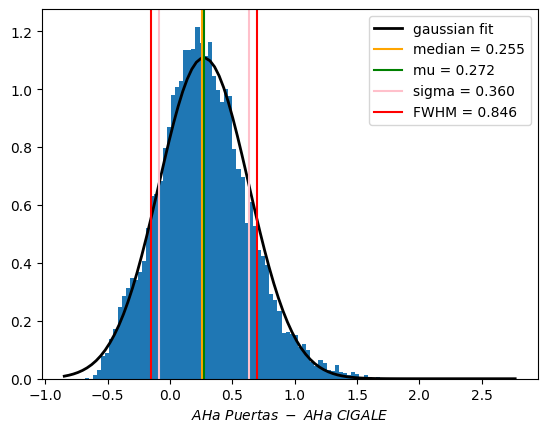

In [56]:
 plot_subs_AHa(a)

In [54]:
 plot_subs_AHa(a)

median = -0.46853813554075596
mu = -0.45601167103794993
sigma =0.36656579843493786
FWHM = 0.861429626322104


median = 0.3410156574203341
mu = 0.35857824953301354
sigma =0.36279401902574554
FWHM = 0.8525659447105021


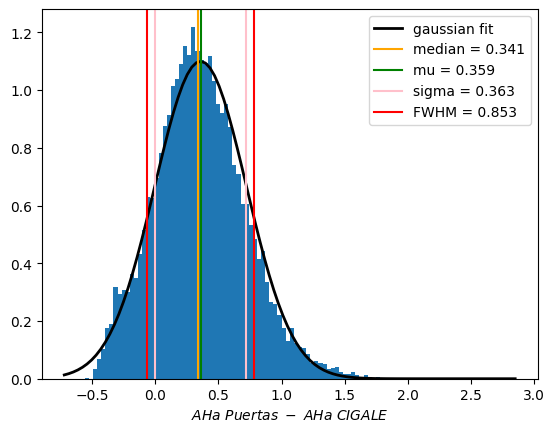

In [52]:
 plot_subs_AHa(a)

/tmp/ipykernel_3798/3583752949.py:124: RuntimeWarning: divide by zero encountered in log10
  cax = (axTemperature.imshow(np.log10(H),origin='lower',
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


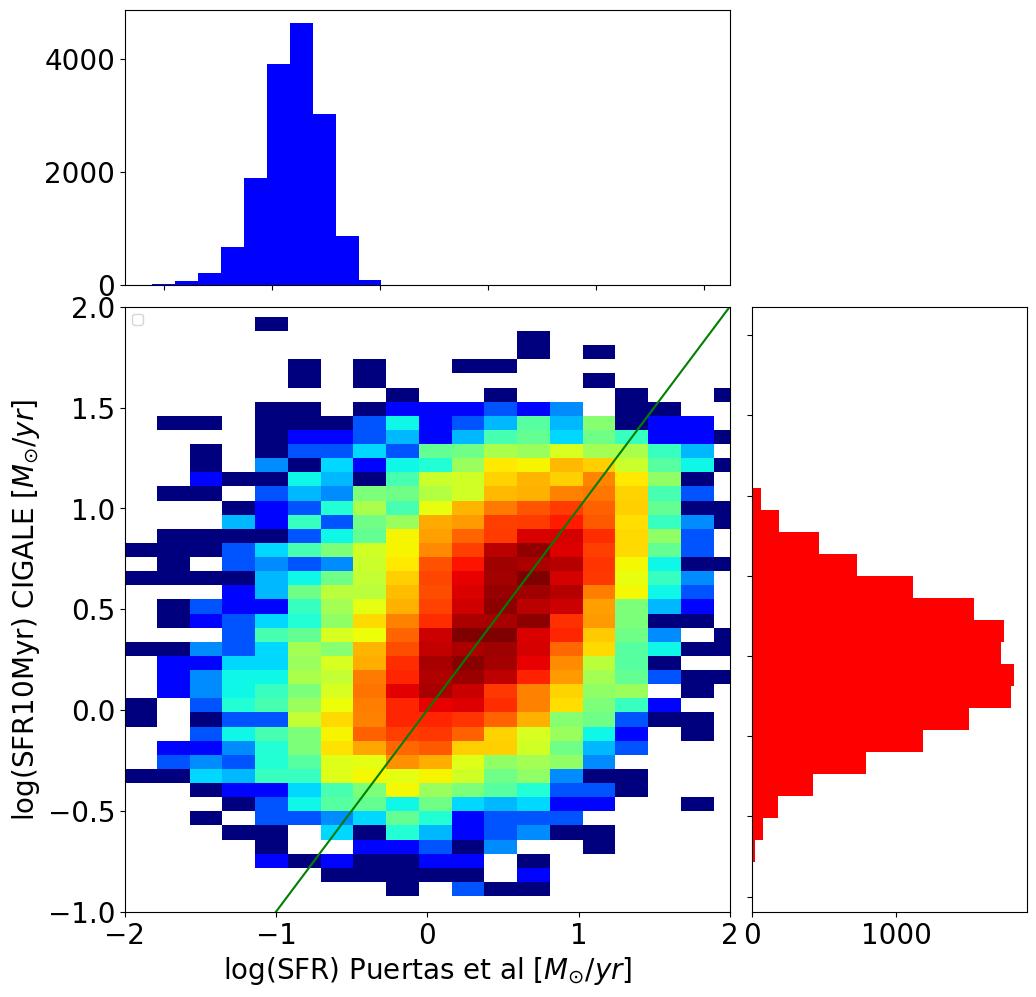

In [34]:
plot_SDSS_jplus(a,1)

In [35]:
plot_SDSS_jplus(a,2)

/tmp/ipykernel_3798/3583752949.py:124: RuntimeWarning: divide by zero encountered in log10
  cax = (axTemperature.imshow(np.log10(H),origin='lower',
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [57]:
def plot_SDSS_jplus_z(results_cigale2):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import NullFormatter, MaxNLocator
    from numpy import linspace
    import numpy as np
    #np.random.seed(12345)
    import matplotlib.pyplot as plt
    from scipy import stats

    #flag=1.
    plt.ion()

     # Define the x and y data 
    #Retrieve only those in the main sequence
    results_cigale2 = results_cigale2[results_cigale2['Star_Forming']==1.0]
    print(len(results_cigale2))
    z_jplus=(results_cigale2['redshift'].data)

    ##SFR_lim=SFR[(SFR<3)&(SFR>-4)]
    SFR_lim= z_jplus
    #SFR_lim_inst = np.log10(results_cigale2['bayes.sfh.sfr'].data)
    #SFR_lim_inst=SFR_lim_inst[(SFR<3)&(SFR>-4)]

    y=SFR_lim #-1.00
    #y = SFR

    z_sdss=(results_cigale2['z_SDSS'].data)
    #logmass=logmass[(SFR<3)&(SFR>-4)]

    x=z_sdss
    # Set up default x and y limits
    xlims = [min(x),max(x)]
    ylims = [min(y),max(y)]
    #ylims = [-4.5,3]

    # Set up your x and y labels
    xlabel = '$\mathrm{Your\\ X\\ Label}$'
    ylabel = '$\mathrm{Your\\ Y\\ Label}$'

    # Define the locations for the axes
    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width+0.02

    # Set up the geometry of the three plots
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram




    fontsize_num = 20

    # Set up the size of the figure
    fig = plt.figure(1, figsize=(11,11))
    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axTemperature.set_xlabel('z Puertas et al.',fontsize = fontsize_num)
    axTemperature.set_ylabel('z JPLUS',fontsize = fontsize_num)
    axTemperature.tick_params(axis='both', which='major',labelsize = fontsize_num)
    axTemperature.tick_params(axis='both', which='minor',labelsize = fontsize_num)
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram
    axHistx.tick_params(axis='both', which='major',labelsize = fontsize_num)
    axHisty.tick_params(axis='both', which='major',labelsize = fontsize_num)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # Find the min/max of the data
    xmin = min(x)
    xmax = max(x)
    ymin = min(y)
    ymax = max(y)

    # Make the 'main' temperature plot
    # Define the number of bins
    nxbins = 25
    nybins = 25
    nbins = 25#2*(len(y))**(1/3.)

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = 1.0*(xmax - 0)/(1.0*ymax - 0)

    #H, yedges, xedges = np.histogram2d(sSFR_lim, logmass, bins=nbins)
    H, yedges,xedges = np.histogram2d(y,x,bins=(ybins,xbins))#,weights=SFR_lim_inst)
    X = xcenter
    Y = ycenter
    Z = H

    # Plot the temperature data
    #cax = (axTemperature.imshow(H, extent=[xmin,xmax,ymin,ymax],
     #      interpolation='nearest', origin='lower',aspect=aspectratio))

    ymedian=np.median(y) 
    ymean=np.mean(y)

    cmap = plt.cm.jet
    cmap.set_bad('w', 1.)

    cmap_multicolor = plt.cm.jet
    cmap_multicolor.set_bad('w', 1.)    

    #cax = (axTemperature.imshow(np.log10(H),origin='lower',
     #          extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
      #         aspect='auto', interpolation='nearest', cmap=cmap))

    cax = (axTemperature.imshow(np.log10(H),origin='lower',

               aspect='auto', interpolation='nearest', cmap=cmap,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]))#,extent=[7,13,-13,-8]))

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)

    #a,b=np.hist(x, bins=xbins)      
    axHistx.hist(x, bins=xbins, color = 'blue')#,range=(7.,13.))
    axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'red')#, density = True)#,range=(-13.,-8.))

    
    x=np.linspace(-2,2,100)
    y = x 
    axTemperature.plot(x,y,color ='green')
    #axHisty.axhline(ymedian)
    #axHisty.axhline(ymean)

    #Fit

    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from scipy.optimize import curve_fit
    from scipy.interpolate import UnivariateSpline

    #y_to_fit,x_to_fit=np.histogram(y,bins=ybins)

    x_to_fit,y_to_fit=np.histogram(y,bins=ybins, density=True)

    y_to_fit= (y_to_fit[1:]+y_to_fit[:-1])/2


    def gauss(x, mu, sigma, A):
        return A*np.exp(-(x-mu)**2/2/sigma**2)

    def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
        return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

    expected = (-8.5,0.1,3000,-11,0.5,4000)

    #params, cov = curve_fit(bimodal, y_to_fit, x_to_fit,expected)

    #sigma=np.sqrt(np.diag(cov))

    y_fit = np.linspace(y_to_fit.min(), y_to_fit.max(),100)

    density = stats.gaussian_kde(y)
    density.covariance_factor = lambda : .1
    density._compute_covariance()
    axTemperature.set_xlim(0.,0.3)
    axTemperature.set_ylim(0.,0.4)
    axTemperature.legend(fontsize=10)
    plt.draw()

    # Save to a File
    filename = 'SFR_low_range_extinction_reduced_chisquare_all_oliver_and_coil_02_03_xi_square_10_75_relerr_0_5_z_jplus_z_SDSS'
    #plt.savefig(filename+str(oddsmin)+ 'mag_lim'+str(maglimr) + 'flag_' + str(flag)+str(zmin)+str(zmax)+'_dex1_randz.png',format = 'png', transparent=True, facecolor='white')

/tmp/ipykernel_3798/2960957217.py:115: RuntimeWarning: divide by zero encountered in log10
  cax = (axTemperature.imshow(np.log10(H),origin='lower',
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


15389


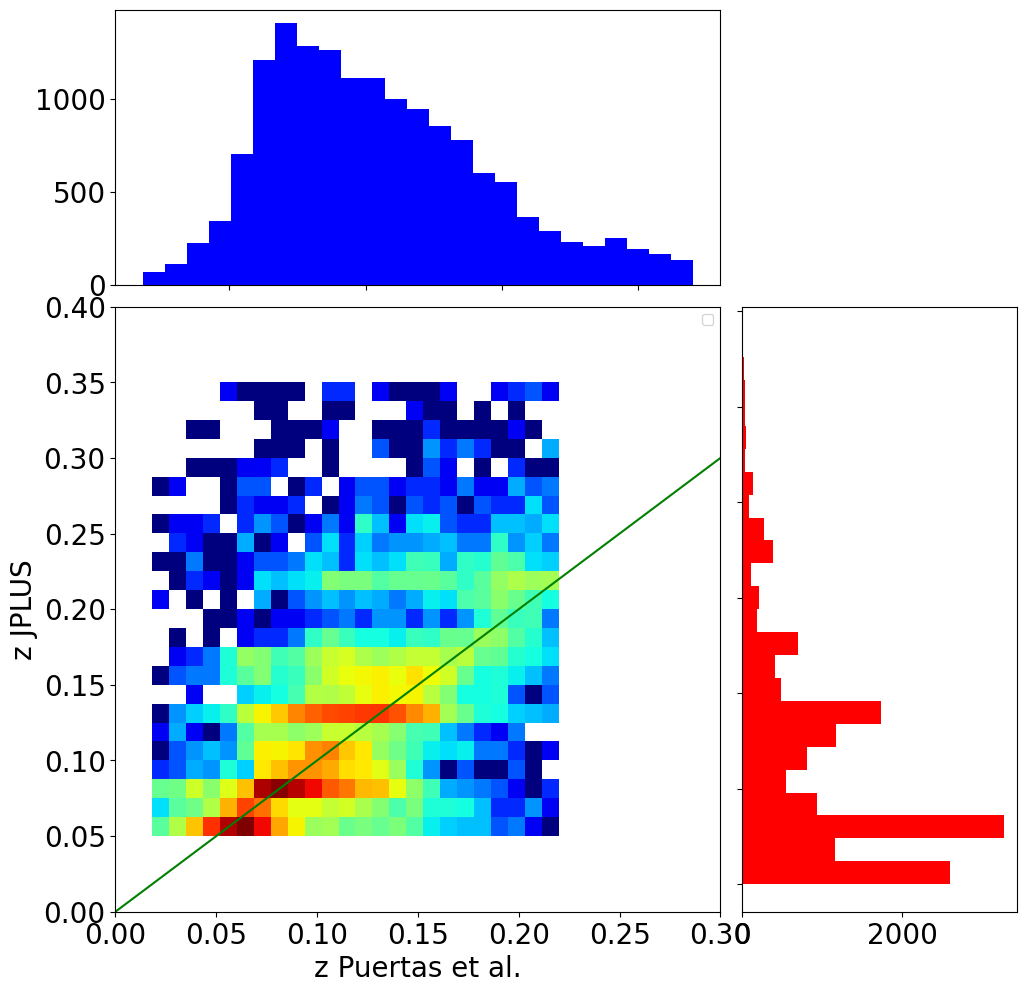

In [58]:
plot_SDSS_jplus_z(a)

In [35]:
def plot_sfr_DP_CIGALE(results_cigale2,flag):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import NullFormatter, MaxNLocator
    from numpy import linspace
    import numpy as np
    #np.random.seed(12345)
    import matplotlib.pyplot as plt
    from scipy import stats

    #flag = 2.
    plt.ion()

     # Define the x and y data 
    results_cigale2 = results_cigale2[results_cigale2['Star_Forming']==1.0]
    if flag==0.:
        SFR=np.log10(results_cigale2['bayes.sfh.sfr100Myrs'].data)
    elif flag==1.:
        SFR=np.log10(results_cigale2['bayes.sfh.sfr10Myrs'].data)
    elif flag==2.:
        SFR=np.log10(results_cigale2['bayes.sfh.sfr'].data)

    ##SFR_lim=SFR[(SFR<3)&(SFR>-4)]
    SFR_lim= SFR
    #SFR_lim_inst = np.log10(results_cigale2['bayes.sfh.sfr'].data)
    #SFR_lim_inst=SFR_lim_inst[(SFR<3)&(SFR>-4)]

    y=SFR_lim #-1.00
    #y = SFR

    logmass=np.log10(results_cigale2['bayes.stellar.m_star'].data)
    #logmass=logmass[(SFR<3)&(SFR>-4)]

    x=logmass
    # Set up default x and y limits
    xlims = [min(x),max(x)]
    ylims = [min(y),max(y)]
    #ylims = [-4.5,3]

    # Set up your x and y labels
    xlabel = '$\mathrm{Your\\ X\\ Label}$'
    ylabel = '$\mathrm{Your\\ Y\\ Label}$'

    # Define the locations for the axes
    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width+0.02

    # Set up the geometry of the three plots
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram




    fontsize_num = 20

    # Set up the size of the figure
    fig = plt.figure(1, figsize=(11,11))
    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axTemperature.set_xlabel('$\log(M/M_{\odot})$',fontsize = fontsize_num)
    if flag == 0.:
        axTemperature.set_ylabel('log(SFR100Myrs) [$M_{\odot}/yr$]',fontsize = fontsize_num)
    if flag == 1.:
        axTemperature.set_ylabel('log(SFR10Myrs) [$M_{\odot}/yr$]',fontsize = fontsize_num)
    if flag == 2.:
        axTemperature.set_ylabel('log(SFR) [$M_{\odot}/yr$]',fontsize = fontsize_num)
    
    
    
    axTemperature.tick_params(axis='both', which='major',labelsize = fontsize_num)
    axTemperature.tick_params(axis='both', which='minor',labelsize = fontsize_num)
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram
    axHistx.tick_params(axis='both', which='major',labelsize = fontsize_num)
    axHisty.tick_params(axis='both', which='major',labelsize = fontsize_num)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # Find the min/max of the data
    xmin = min(x)
    xmax = max(x)
    ymin = min(y)
    ymax = max(y)

    # Make the 'main' temperature plot
    # Define the number of bins
    nxbins = 100
    nybins = 100
    nbins = 25#2*(len(y))**(1/3.)

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = 1.0*(xmax - 0)/(1.0*ymax - 0)

    #H, yedges, xedges = np.histogram2d(sSFR_lim, logmass, bins=nbins)
    H, yedges,xedges = np.histogram2d(y,x,bins=(ybins,xbins))#,weights=SFR_lim_inst)
    X = xcenter
    Y = ycenter
    Z = H

    # Plot the temperature data
    #cax = (axTemperature.imshow(H, extent=[xmin,xmax,ymin,ymax],
     #      interpolation='nearest', origin='lower',aspect=aspectratio))

    ymedian=np.median(y) 
    ymean=np.mean(y)

    cmap = plt.cm.jet
    cmap.set_bad('w', 1.)

    cmap_multicolor = plt.cm.jet
    cmap_multicolor.set_bad('w', 1.)    

    #cax = (axTemperature.imshow(np.log10(H),origin='lower',
     #          extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
      #         aspect='auto', interpolation='nearest', cmap=cmap))

    cax = (axTemperature.imshow(np.log10(H),origin='lower',

               aspect='auto', interpolation='nearest', cmap=cmap,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]))#,extent=[7,13,-13,-8]))

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)

    #a,b=np.hist(x, bins=xbins)      
    axHistx.hist(x, bins=xbins, color = 'blue')#,range=(7.,13.))
    axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'red')#, density = True)#,range=(-13.,-8.))

    #axHisty.axhline(ymedian)
    #axHisty.axhline(ymean)

    #Fit

    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from scipy.optimize import curve_fit
    from scipy.interpolate import UnivariateSpline

    #y_to_fit,x_to_fit=np.histogram(y,bins=ybins)

    x_to_fit,y_to_fit=np.histogram(y,bins=ybins, density=True)

    y_to_fit= (y_to_fit[1:]+y_to_fit[:-1])/2


    def gauss(x, mu, sigma, A):
        return A*np.exp(-(x-mu)**2/2/sigma**2)

    def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
        return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

    expected = (-8.5,0.1,3000,-11,0.5,4000)

    #params, cov = curve_fit(bimodal, y_to_fit, x_to_fit,expected)

    #sigma=np.sqrt(np.diag(cov))

    y_fit = np.linspace(y_to_fit.min(), y_to_fit.max(),100)

    #print(params)

    #print(pd.DataFrame(data={'params': params, 'sigma': sigma}, index=bimodal.__code__.co_varnames[1:]))

    #axHisty.plot( bimodal(y_fit, *params),y_fit, color='blue',label= 'Model with {} < ODDS < {} '.format(oddsmin,oddsmax), lw=2 )#orientation='horizontal')

    #g1=gauss(x_fit, *params[:3])
    #g2=gauss(x_fit, *params[3:])
    #print(g1,g2)

    #axHisty.plot(gauss(y_fit, *params[:3]),y_fit, color='blue', lw=1, ls="--", label='distribution 1. Sample= {0:4.2f} %'.format(rel))
    #axHisty.plot( gauss(y_fit, *params[3:]),y_fit, color='blue', lw=1, ls=":", label='distribution 2. rSDSS_lim = {0:4.2f}'.format(maglimr))

    # Spline fit
    #spl = UnivariateSpline(y_to_fit, x_to_fit, k = 3)

    #print(min(spl(y_fit)))

    #b = (np.diff(np.sign(np.diff(spl(y_fit)))) > 0).nonzero()[0] + 1 # local min

    #print(y_fit[b])



    #axHisty.plot(spl(y_fit),y_fit, color= 'green', lw=1)
    #axHisty.axhline(y_fit[b], color= 'blue', lw=1)

    #axHisty.axhline(y_fit[77],color='black')









    density = stats.gaussian_kde(y)
    density.covariance_factor = lambda : .1
    density._compute_covariance()
    #x = np.arange(-13, -8, .1)
    #axHisty.plot(density(x), x,color ='pink',lw=1)
    #axHisty.plot(density(y_fit), y_fit,color ='pink',lw=1)
    #a = (np.diff(np.sign(np.diff(density(y_fit)))) > 0).nonzero()[0] + 1

    #print(y_fit[a])
    #y_fit_redux=y_fit[(y_fit<-8.9) &(y_fit>-10.5)]


    #sSFR_lim=y_fit_redux[bimodal(y_fit_redux, *params).argmin()]

    #axHisty.axhline(y_fit_redux[bimodal(y_fit_redux, *params).argmin()],label='log(sSFR_lim) = {0:4.2f}'.format(sSFR_lim))

    #axHistx.axvline(y_fit_redux[bimodal(y_fit_redux, *params).argmin()])

    #print('sSFR_lim = {}'.format(sSFR_lim))

    #axTemperature.axhline(y_fit[a])
    x1=np.linspace(8.5,11,100)
    y1=0.76*x1-7.64
    y2=0.77*x1-7.64
    y3=0.75*x1-7.64
    y3=0.674*x1-6.836 # SAMI MaNGA. Fraser-McKelvi.
    #y4=0.76*x1-7.64+dex #MOD for our data?
    y_renzini = 0.76*x1 -7.60
    y_lara = 0.55*x1 -5.25
    y_Elbaz = 0.77*x1 -7.53
    y_Vilella_Rojo = 0.83*x1 -8.44
    y_S07 = 0.65*x1-6.33
    a0,a1,b0,b1,b2=0.20, -0.034, -26.134, 4.722, -0.1925 # Eq. 10 Renzini
    a00,a11,a22,a33,a44 = 2.63, -0.186, 10.85, -0.0729, 0.99 #Eq. 14 Renzini 

    y_zahid_2012 = 0.71*x1 - 6.79
    ms_puertas = Table.read('MS_PUERTAS.csv', delimiter ='\t', format ='ascii.csv')
    x_puertas= ms_puertas['log_mass']
    y_puertas= ms_puertas['SFR']
    #y_speagle = (0.84 -0.026*(cosmo.age(zmin).value - cosmo.age(zmax).value))*x1 -(6.51 -0.11*(cosmo.age(zmin).value - cosmo.age(zmax).value))
    #y_speagle = (0.84 -0.026*(cosmo.age(zmax).value))*x1 -(6.51 -0.11*(cosmo.age(zmax).value))
    #y_speagle3 = (0.84+0.02 -0.023*(cosmo.age(zmax).value))*x1 -(6.51+0.24 -(0.11-0.03)*(cosmo.age(zmax).value))
    #y_speagle3_1 = (0.84-0.02 -0.029*(cosmo.age(zmax).value))*x1 -(6.51-0.24 -(0.11+0.03)*(cosmo.age(zmax).value))

    #y_speagle2 = (0.84 -0.026*(cosmo.age(zmin).value))*x1 -(6.51 -0.11*(cosmo.age(zmin).value))
    #t=9.8542
    #t = cosmo.age(zmax).value
    #y_fit=(a1*t+b1)*x1 +b2*x1**2+(b0+a0*t)
    #y_fit_2= a00 + a11*t - np.log10(1+(10**(x1)/(10**(a22+a33*t)))**(-a44))
    #axTemperature.plot(x1,y1)
    #axTemperature.plot(x1,y2)
    #axTemperature.plot(x1,y3)




    ###############################
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    axTemperature.plot(x1,slope*x1+intercept,color = 'pink',linewidth =2,label = 'fit CIGALE SFR, fit: a=%5.3f, b=%5.3f'%tuple((slope,intercept)))

    ###############################

    import numpy as np

    import matplotlib.pyplot as plt

    from scipy.optimize import curve_fit

    def func(x, a, b, c):

        return a*x**2+b*x+c

    popt, pcov = curve_fit(func, x, y)

    print(popt)

    axTemperature.plot(x1, func(x1, *popt), 'c--',

             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

    ###############################



    #x_puertas-0.04-0.18,y_puertas-np.log10(0.943)


    #axTemperature.scatter(x1,y_renzini, label='Renzini & Peng (2015) ',s=5)
    #axTemperature.scatter(x1,y4, label = 'Renzini & Peng +{}dex'.format(dex),s=5)
    #axTemperature.scatter(x1,y_lara, label='Lara-Lopez et al (2013)',s=5)
    #axTemperature.scatter(x1,y_Elbaz, label='Elbaz et al. (2017)',s=5)
    #axTemperature.scatter(x1,y_Vilella_Rojo, label='Vilella-Rojo (2021)',s=5)
    #axTemperature.scatter(x1,y_S07, label='S07 (TABLE)',s=5)
    #axTemperature.scatter(x1,y_fit, label='Renzini fit Eq. 10',s=5)
    #axTemperature.scatter(x1,y_fit_2, label='Renzini fit 2 Eq.14',s=5)
    axTemperature.plot(x1,y_zahid_2012,'b--' ,label='Zahid 2012 0.04<z<0.1')
    axTemperature.plot(x_puertas,y_puertas,'k--' ,label='Puertas 0.002<z<0.22')
    axTemperature.plot(x_puertas,y_puertas+0.25,'k.', label='Puertas 0.002<z<0.22 + 0.25 dex')
    
    axTemperature.plot(x_puertas-0.04-0.14,y_puertas-np.log10(0.943),'k-' ,label='Puertas 0.002<z<0.0.22 - 0.14 in log(M_star)')
    axTemperature.plot(x_puertas-0.04-0.18,y_puertas-np.log10(0.943),'g-' ,label='Puertas 0.002<z<0.0.22 -0.18 in log(M_star)')
    
    
    #axTemperature.plot(x1,y_zahid_2012-1, label='Zahid 2012')
    #axTemperature.scatter(x1,y_speagle ,label='Speagle zmax 2015',s=5)
    #axTemperature.scatter(x1,y_speagle2 ,label='Speagle zmin 2015',s=5)
    #axTemperature.scatter(x1,y_speagle3 ,label='Speagle extreme 1 2015',s=5)
    #axTemperature.scatter(x1,y_speagle3_1 ,label='Speagle extreme 2 2015',s=5)
    #axHisty.axhline(y_fit[a], color= 'blue', lw=1)
    #print('sSFR_lim = %'.format())
    #axTemperature.axhline(y_fit[77])
    #print(y_fit[77])
    #Show the plot
    axTemperature.legend(fontsize=12)
    plt.draw()

    # Save to a File
    filename = 'SFR_low_range_extinction_reduced_chisquare_all_zahid_speagel_xi_square_10_75_relerr_0_4_quiesc_Q_2'
    #plt.savefig(filename+str(oddsmin)+ 'maglimr' + str(maglimr) + 'flag_' + str(flag)+str(zmin)+str(zmax)+'_dex1_randz_test.png',format = 'png', transparent=True, facecolor='white')

In [36]:
plot_sfr_DP_CIGALE(a,2)

/tmp/ipykernel_6402/1804777795.py:126: RuntimeWarning: divide by zero encountered in log10
  cax = (axTemperature.imshow(np.log10(H),origin='lower',


[ 0.09958246 -1.22088753  2.5994768 ]


In [30]:
plot_sfr_DP_CIGALE(a,2)

/tmp/ipykernel_14750/1759751765.py:126: RuntimeWarning: divide by zero encountered in log10
  cax = (axTemperature.imshow(np.log10(H),origin='lower',


[ 0.09958246 -1.22088753  2.5994768 ]


In [31]:
plot_sfr_DP_CIGALE(a,1)

/tmp/ipykernel_14750/1759751765.py:126: RuntimeWarning: divide by zero encountered in log10
  cax = (axTemperature.imshow(np.log10(H),origin='lower',


[ 0.10223313 -1.27637296  2.89128825]


In [32]:
plot_sfr_DP_CIGALE(a,0.)

/tmp/ipykernel_14750/1759751765.py:126: RuntimeWarning: divide by zero encountered in log10
  cax = (axTemperature.imshow(np.log10(H),origin='lower',


[ 0.08370877 -0.92117858  1.27137107]


In [49]:
def plot_sfr_DP_CIGALE2(results_cigale2):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import NullFormatter, MaxNLocator
    from numpy import linspace
    import numpy as np
    #np.random.seed(12345)
    import matplotlib.pyplot as plt
    from scipy import stats

    #flag = 2.
    plt.ion()

     # Define the x and y data 
    #results_cigale2 = results_cigale2[results_cigale2['Star_Forming']==1.0]
    
    
    SFR=(results_cigale2['logSFR_SDSS'].data)


    ##SFR_lim=SFR[(SFR<3)&(SFR>-4)]
    SFR_lim= SFR
    #SFR_lim_inst = np.log10(results_cigale2['bayes.sfh.sfr'].data)
    #SFR_lim_inst=SFR_lim_inst[(SFR<3)&(SFR>-4)]

    y=SFR_lim #-1.00
    #y = SFR

    logmass=results_cigale2['logSFR_SDSS'].data-results_cigale2['logsSFR_SDSS'].data+9
    
    #logmass=logmass[(SFR<3)&(SFR>-4)]

    x=logmass
    # Set up default x and y limits
    xlims = [min(x),max(x)]
    ylims = [min(y),max(y)]
    #ylims = [-4.5,3]

    # Set up your x and y labels
    xlabel = '$\mathrm{Your\\ X\\ Label}$'
    ylabel = '$\mathrm{Your\\ Y\\ Label}$'

    # Define the locations for the axes
    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width+0.02

    # Set up the geometry of the three plots
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram




    fontsize_num = 20

    # Set up the size of the figure
    fig = plt.figure(1, figsize=(11,11))
    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axTemperature.set_xlabel('$\log(M/M_{\odot})$',fontsize = fontsize_num)

    axTemperature.set_ylabel('log(SFR)  DP  [$M_{\odot}/yr$]',fontsize = fontsize_num)
    
    axTemperature.tick_params(axis='both', which='major',labelsize = fontsize_num)
    axTemperature.tick_params(axis='both', which='minor',labelsize = fontsize_num)
    #axHistx = plt.axes(rect_histx) # x histogram
    #axHisty = plt.axes(rect_histy) # y histogram
    #axHistx.tick_params(axis='both', which='major',labelsize = fontsize_num)
    #axHisty.tick_params(axis='both', which='major',labelsize = fontsize_num)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #axHistx.xaxis.set_major_formatter(nullfmt)
    #axHisty.yaxis.set_major_formatter(nullfmt)

    # Find the min/max of the data
    xmin = min(x)
    xmax = max(x)
    ymin = min(y)
    ymax = max(y)

    # Make the 'main' temperature plot
    # Define the number of bins
    nxbins = 100
    nybins = 100
    nbins = 25#2*(len(y))**(1/3.)

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = 1.0*(xmax - 0)/(1.0*ymax - 0)

    #H, yedges, xedges = np.histogram2d(sSFR_lim, logmass, bins=nbins)
    H, yedges,xedges = np.histogram2d(y,x,bins=(ybins,xbins))#,weights=SFR_lim_inst)
    X = xcenter
    Y = ycenter
    Z = H

    # Plot the temperature data
    #cax = (axTemperature.imshow(H, extent=[xmin,xmax,ymin,ymax],
     #      interpolation='nearest', origin='lower',aspect=aspectratio))

    ymedian=np.median(y) 
    ymean=np.mean(y)

    cmap = plt.cm.jet
    cmap.set_bad('w', 1.)

    cmap_multicolor = plt.cm.jet
    cmap_multicolor.set_bad('w', 1.)    

    #cax = (axTemperature.imshow(np.log10(H),origin='lower',
     #          extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
      #         aspect='auto', interpolation='nearest', cmap=cmap))

    cax = (axTemperature.imshow(np.log10(H),origin='lower',

               aspect='auto', interpolation='nearest', cmap=cmap,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]))#,extent=[7,13,-13,-8]))

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)

    #a,b=np.hist(x, bins=xbins)      
    #axHistx.hist(x, bins=xbins, color = 'blue')#,range=(7.,13.))
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'red')#, density = True)#,range=(-13.,-8.))

    #axHisty.axhline(ymedian)
    #axHisty.axhline(ymean)

    #Fit

    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from scipy.optimize import curve_fit
    from scipy.interpolate import UnivariateSpline

    #y_to_fit,x_to_fit=np.histogram(y,bins=ybins)

    x_to_fit,y_to_fit=np.histogram(y,bins=ybins, density=True)

    y_to_fit= (y_to_fit[1:]+y_to_fit[:-1])/2


    def gauss(x, mu, sigma, A):
        return A*np.exp(-(x-mu)**2/2/sigma**2)

    def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
        return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

    expected = (-8.5,0.1,3000,-11,0.5,4000)

    #params, cov = curve_fit(bimodal, y_to_fit, x_to_fit,expected)

    #sigma=np.sqrt(np.diag(cov))

    y_fit = np.linspace(y_to_fit.min(), y_to_fit.max(),100)

    #print(params)

    #print(pd.DataFrame(data={'params': params, 'sigma': sigma}, index=bimodal.__code__.co_varnames[1:]))

    #axHisty.plot( bimodal(y_fit, *params),y_fit, color='blue',label= 'Model with {} < ODDS < {} '.format(oddsmin,oddsmax), lw=2 )#orientation='horizontal')

    #g1=gauss(x_fit, *params[:3])
    #g2=gauss(x_fit, *params[3:])
    #print(g1,g2)

    #axHisty.plot(gauss(y_fit, *params[:3]),y_fit, color='blue', lw=1, ls="--", label='distribution 1. Sample= {0:4.2f} %'.format(rel))
    #axHisty.plot( gauss(y_fit, *params[3:]),y_fit, color='blue', lw=1, ls=":", label='distribution 2. rSDSS_lim = {0:4.2f}'.format(maglimr))

    # Spline fit
    #spl = UnivariateSpline(y_to_fit, x_to_fit, k = 3)

    #print(min(spl(y_fit)))

    #b = (np.diff(np.sign(np.diff(spl(y_fit)))) > 0).nonzero()[0] + 1 # local min

    #print(y_fit[b])



    #axHisty.plot(spl(y_fit),y_fit, color= 'green', lw=1)
    #axHisty.axhline(y_fit[b], color= 'blue', lw=1)

    #axHisty.axhline(y_fit[77],color='black')









    density = stats.gaussian_kde(y)
    density.covariance_factor = lambda : .1
    density._compute_covariance()
    #x = np.arange(-13, -8, .1)
    #axHisty.plot(density(x), x,color ='pink',lw=1)
    #axHisty.plot(density(y_fit), y_fit,color ='pink',lw=1)
    #a = (np.diff(np.sign(np.diff(density(y_fit)))) > 0).nonzero()[0] + 1

    #print(y_fit[a])
    #y_fit_redux=y_fit[(y_fit<-8.9) &(y_fit>-10.5)]


    #sSFR_lim=y_fit_redux[bimodal(y_fit_redux, *params).argmin()]

    #axHisty.axhline(y_fit_redux[bimodal(y_fit_redux, *params).argmin()],label='log(sSFR_lim) = {0:4.2f}'.format(sSFR_lim))

    #axHistx.axvline(y_fit_redux[bimodal(y_fit_redux, *params).argmin()])

    #print('sSFR_lim = {}'.format(sSFR_lim))

    #axTemperature.axhline(y_fit[a])
    x1=np.linspace(8.5,11,100)
    y1=0.76*x1-7.64
    y2=0.77*x1-7.64
    y3=0.75*x1-7.64
    y3=0.674*x1-6.836 # SAMI MaNGA. Fraser-McKelvi.
    #y4=0.76*x1-7.64+dex #MOD for our data?
    y_renzini = 0.76*x1 -7.60
    y_lara = 0.55*x1 -5.25
    y_Elbaz = 0.77*x1 -7.53
    y_Vilella_Rojo = 0.83*x1 -8.44
    y_S07 = 0.65*x1-6.33
    a0,a1,b0,b1,b2=0.20, -0.034, -26.134, 4.722, -0.1925 # Eq. 10 Renzini
    a00,a11,a22,a33,a44 = 2.63, -0.186, 10.85, -0.0729, 0.99 #Eq. 14 Renzini 

    y_zahid_2012 = 0.71*x1 - 6.79
    ms_puertas = Table.read('MS_PUERTAS.csv', delimiter ='\t', format ='ascii.csv')
    x_puertas= ms_puertas['log_mass']
    y_puertas= ms_puertas['SFR']
    #y_speagle = (0.84 -0.026*(cosmo.age(zmin).value - cosmo.age(zmax).value))*x1 -(6.51 -0.11*(cosmo.age(zmin).value - cosmo.age(zmax).value))
    #y_speagle = (0.84 -0.026*(cosmo.age(zmax).value))*x1 -(6.51 -0.11*(cosmo.age(zmax).value))
    #y_speagle3 = (0.84+0.02 -0.023*(cosmo.age(zmax).value))*x1 -(6.51+0.24 -(0.11-0.03)*(cosmo.age(zmax).value))
    #y_speagle3_1 = (0.84-0.02 -0.029*(cosmo.age(zmax).value))*x1 -(6.51-0.24 -(0.11+0.03)*(cosmo.age(zmax).value))

    #y_speagle2 = (0.84 -0.026*(cosmo.age(zmin).value))*x1 -(6.51 -0.11*(cosmo.age(zmin).value))
    #t=9.8542
    #t = cosmo.age(zmax).value
    #y_fit=(a1*t+b1)*x1 +b2*x1**2+(b0+a0*t)
    #y_fit_2= a00 + a11*t - np.log10(1+(10**(x1)/(10**(a22+a33*t)))**(-a44))
    #axTemperature.plot(x1,y1)
    #axTemperature.plot(x1,y2)
    #axTemperature.plot(x1,y3)




    ###############################
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    axTemperature.plot(x1,slope*x1+intercept,color = 'pink',linewidth =2,label = 'fit CIGALE SFR, fit: a=%5.3f, b=%5.3f'%tuple((slope,intercept)))

    ###############################

    import numpy as np

    import matplotlib.pyplot as plt

    from scipy.optimize import curve_fit

    def func(x, a, b, c):

        return a*x**2+b*x+c

    popt, pcov = curve_fit(func, x, y)

    print(popt)

    axTemperature.plot(x1, func(x1, *popt), 'c--',

             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

    ###############################






    #axTemperature.scatter(x1,y_renzini, label='Renzini & Peng (2015) ',s=5)
    #axTemperature.scatter(x1,y4, label = 'Renzini & Peng +{}dex'.format(dex),s=5)
    #axTemperature.scatter(x1,y_lara, label='Lara-Lopez et al (2013)',s=5)
    #axTemperature.scatter(x1,y_Elbaz, label='Elbaz et al. (2017)',s=5)
    #axTemperature.scatter(x1,y_Vilella_Rojo, label='Vilella-Rojo (2021)',s=5)
    #axTemperature.scatter(x1,y_S07, label='S07 (TABLE)',s=5)
    #axTemperature.scatter(x1,y_fit, label='Renzini fit Eq. 10',s=5)
    #axTemperature.scatter(x1,y_fit_2, label='Renzini fit 2 Eq.14',s=5)
    axTemperature.plot(x1,y_zahid_2012,'b--' ,label='Zahid 2012 0.04<z<0.1')
    axTemperature.plot(x_puertas,y_puertas,'k-' ,label='Puertas 0.002<z<0.22')
    axTemperature.plot(x_puertas,y_puertas+0.25,'k.', label='Puertas 0.002<z<0.22 + 0.25 dex')
    #axTemperature.plot(x1,y_zahid_2012-1, label='Zahid 2012')
    #axTemperature.scatter(x1,y_speagle ,label='Speagle zmax 2015',s=5)
    #axTemperature.scatter(x1,y_speagle2 ,label='Speagle zmin 2015',s=5)
    #axTemperature.scatter(x1,y_speagle3 ,label='Speagle extreme 1 2015',s=5)
    #axTemperature.scatter(x1,y_speagle3_1 ,label='Speagle extreme 2 2015',s=5)
    #axHisty.axhline(y_fit[a], color= 'blue', lw=1)
    #print('sSFR_lim = %'.format())
    #axTemperature.axhline(y_fit[77])
    #print(y_fit[77])
    #Show the plot
    axTemperature.set_ylim(-2,2)
    axTemperature.legend(fontsize=12)
    plt.draw()

    # Save to a File
    filename = 'SFR_low_range_extinction_reduced_chisquare_all_zahid_speagel_xi_square_10_75_relerr_0_4_quiesc_Q_2'
    #plt.savefig(filename+str(oddsmin)+ 'maglimr' + str(maglimr) + 'flag_' + str(flag)+str(zmin)+str(zmax)+'_dex1_randz_test.png',format = 'png', transparent=True, facecolor='white')

[ -0.10446249   3.05499269 -19.94257013]


/tmp/ipykernel_6402/995852518.py:119: RuntimeWarning: divide by zero encountered in log10
  cax = (axTemperature.imshow(np.log10(H),origin='lower',


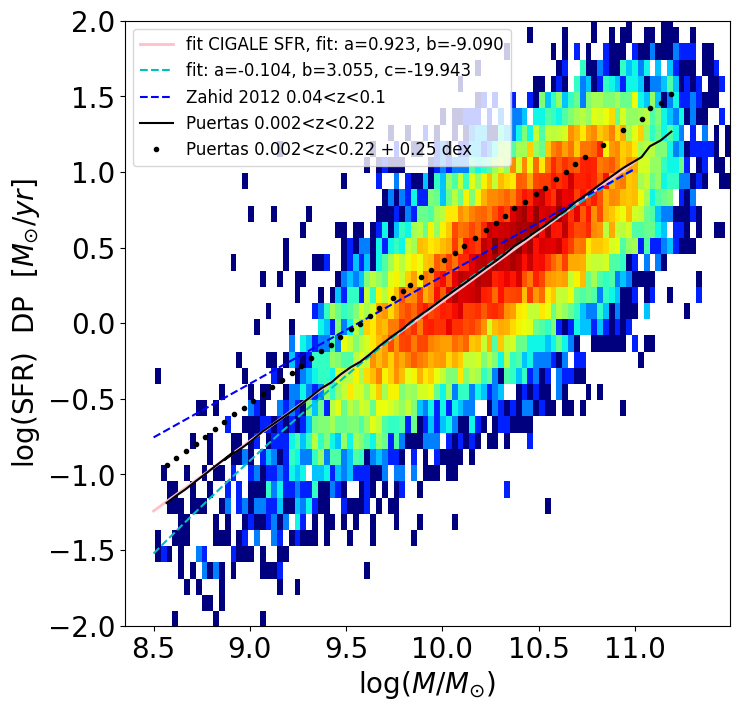

In [50]:
plot_sfr_DP_CIGALE2(a)

/tmp/ipykernel_14750/983512715.py:119: RuntimeWarning: divide by zero encountered in log10
  cax = (axTemperature.imshow(np.log10(H),origin='lower',


[ -0.10446249   3.05499269 -19.94257013]


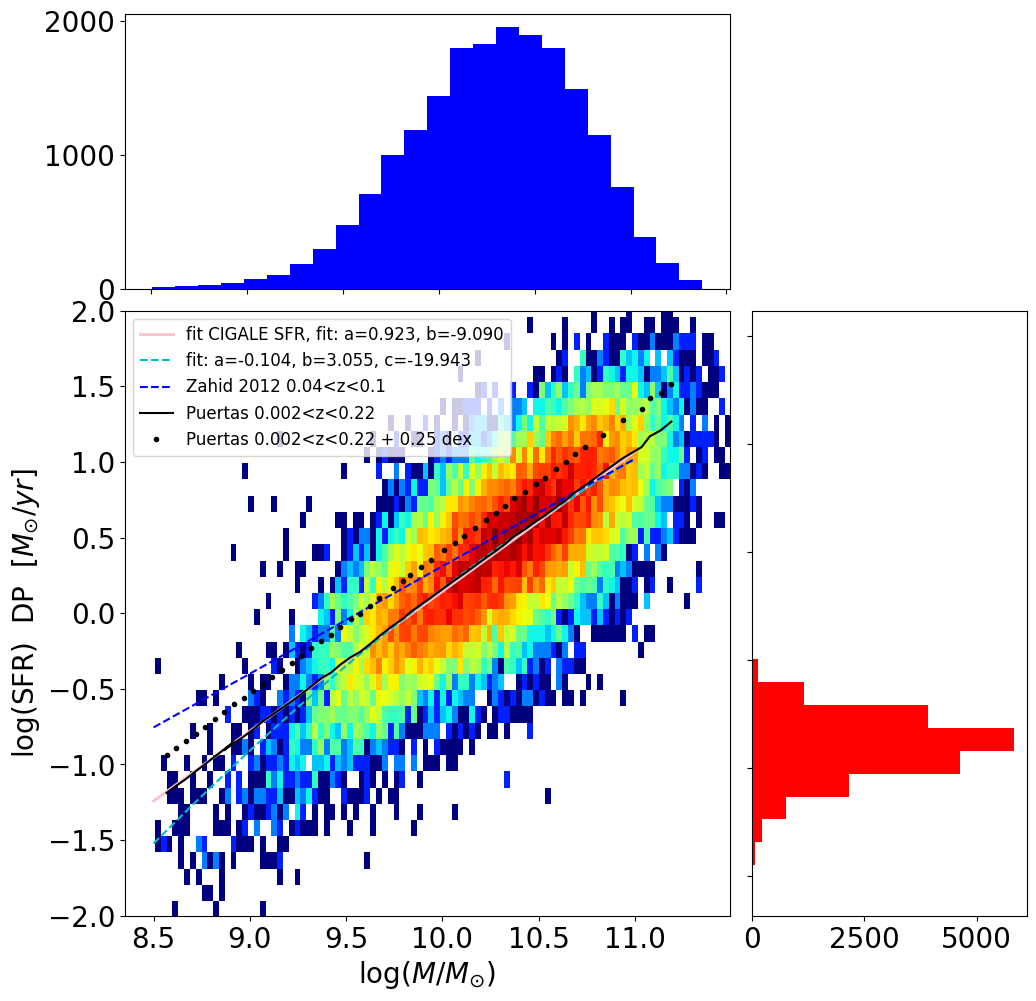

In [42]:
plot_sfr_DP_CIGALE2(a)

Let's compare with Taylor

In [ ]:
galaxies = Table.read('results_joined_all_taylor.fitsvac', format ='fits', memmap = True)

In [7]:
def compute_taylor_hist():
    from scipy.stats import norm 
    import matplotlib.pyplot as plt
    import numpy as np
    import astropy.units as u
    from astropy.coordinates import SkyCoord
    from astropy.cosmology import WMAP9 as cosmo
    from astropy.coordinates import Angle, Latitude, Longitude  # Angles
    from matplotlib import gridspec
    from astropy.table import Table
    from astropy.io import fits
    from astropy.wcs import WCS
    from scipy.optimize import curve_fit
    from astropy.table import vstack
    import pandas as pd
    from astropy.table import unique, Table
    
    galaxies_res = Table.read('results_joined_all_taylor.fitsvac', format ='fits', memmap = True)
    data= galaxies_res['Log_stellar_mass_sun_Taylor_bayes'] - np.log10(galaxies_res['bayes.stellar.m_star'])
    plt.hist(data, bins = 100, density =True)
    mu, std = norm.fit(data[~np.isnan(data)]) 
    xmin, xmax = plt.xlim() 
    x = np.linspace(xmin,xmax, 100) 
    p = norm.pdf(x, mu, std) 
    plt.plot(x, p, 'k', linewidth=2, label ='gaussian fit') 
    median_dif =  np.nanmedian(data)
    plt.axvline(x = median_dif, color ='orange', label ='median = %4.3f'%(median_dif ))
    plt.axvline(x = mu , color ='green', label = 'mu = %4.3f'%(mu))
    plt.axvline(x = mu + std, color ='pink')
    plt.axvline(x = mu -std, color ='pink', label ='sigma = %4.3f'%((std)))
    plt.axvline(x = mu + 2.35*std/2, color ='red')
    plt.axvline(x = mu - 2.35*std/2, color = 'red', label = 'FWHM = %4.3f'%(2.35*std))
    print('median = '+str(median_dif))
    print('mu = ' + str(mu))
    print('sigma =' +str(std))
    print('FWHM = '+str(2.35*std))
    plt.xlabel('$\log(M/M_{\odot})  \ Taylor$ - $\log(M/M_{\odot}) \ CIGALE$')
    plt.xlim(-0.5,0.1)
    plt.legend()
    #'%f*x%f'%(a_fit,b_fit)
    plt.savefig('histogram_subs_logs_M_stellar_Taylor2.png',format = 'png', transparent=True, facecolor='white')

In [8]:
compute_taylor_hist()

median = -0.10166018918814324
mu = -0.11029582685811387
sigma =0.05592172008920917
FWHM = 0.13141604220964156


In [ ]:
import gfit
import numpy as num

sfr = num.loadtxt("SFR_difference_log.txt")

gf = gfit.gfit()

gf.gfit(sfr, nbin = 100, xlabel = "$\Delta SFR$", plot=1, xmin = -3, xmax = 3)


With plot = 0, only the fit is performed.

In [16]:
import gfit

In [60]:
help(gfit)

Help on package gfit:

NAME
    gfit

PACKAGE CONTENTS
    internal
    util

FUNCTIONS
    evaluate(x, M, sym=False)
        Evaluate an array of multigaussian models.
        :param x: a (n,) array of x-values to evaluate gaussians at.
        :param M: a (m,b) array containing b model parameters (where b = 3*nfeatures for symmetric and 4*nfeatures for assymetric models).
        :param sym: True if M represents a set of symmetric features (3-parameter), False (Default) if it contains asymmetric (4-parameter) ones.
    
    gfit(x, X, x0=None, n=3, sym=True, thresh=-1, nthreads=-1, vb=True, **kwds)
        Fit multi-gaussian functions to a data array.
        
        :param x: a (j,) shaped array containg x-coordinates of function.
        :param X: a (i,j) shaped array containing i independent data/spectra to fit.
        :param x0: a (i,n*3) [ sym = True ] or (i,n*4) [ sym = False ] array containing initial values for optimization routine.
                   See initialise( ... ) 

In [4]:
import gfit

In [5]:
help(gfit)

Help on module gfit:

NAME
    gfit

CLASSES
    builtins.object
        gfit
    
    class gfit(builtins.object)
     |  Methods defined here:
     |  
     |  __init__(self)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  cuartil(self, x)
     |  
     |  fitfunc(self, x, y, p0)
     |  
     |  gfit(self, x, nbin=100, xminp='', xmaxp='', xmin='', xmax='', xlabel='z', plot=1, normed=1, w=[], fig=2)
     |      Modulo que dibuja el histograma de una distribucion y la aproximacion gaussiana al mismo.
     |  
     |  histograma(self, x, xmin='', xmax='', nbin=100, norm=1.0)
     |      Modulo que obtiene el histograma de x entre . No lo normaliza si norm == 0
     |  
     |  residuos(self, p, y, x)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     

In [29]:
def plot_subs_sSFR_gfit():
    from scipy.stats import norm 
    import gfit
    gal =Table.read('crossmatch_puertas_jplus.fits',format ='fits', memmap = True)
    gal = gal[(gal['jplus.rSDSS']<=20.)&(gal['redshift']<0.20)]
    
    #print(gal.colnames)
    gal = gal[gal['Star_Forming']==1.0]
#     if flag==0.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr100Myrs'].data)
#     elif flag==1.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr10Myrs'].data)
#     elif flag==2.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr'].data)
    #mass_jplus = np.log10(gal['bayes.stellar.m_star'])
    #mass_SDSS = gal['logSFR_SDSS']+np.log10(0.943)-gal['logsSFR_SDSS']+9 #+0.04 #Kroupa first, then
    data = gal['logsSFR_SDSS']-9- (np.log10(gal['bayes.sfh.sfr10Myrs']/gal['bayes.stellar.m_star']))
    #data= mass_SDSS - mass_jplus
    gf = gfit.gfit()
    print(np.array(data.data))
    #stellarmass = np.array(data.data)
    gf.gfit(data,nbin = 100, xlabel = '\Delta sSFR', plot=1, xmin = -2., xmax = 2.)
    plt.xlabel('$Log(\Delta sSFR^{P})$',fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylabel('Density',fontsize = 14)
    #plt.legend()
    plt.tight_layout()
    plt.savefig('histogram_subs_logs_sSFR_puertas_jplus.png',format = 'png',dpi =200, transparent=True, facecolor='white')
#     np.savetxt('stellar_mass_difference_log.txt', data[~np.isnan(data)], fmt='%.8f')
    #print(data.data)

[-0.49494339  0.3280574  -0.57527101 ... -0.49410397 -1.18446471
 -0.76643918]
mu = -0.150827; sigma = 0.338483; C = 1.164756


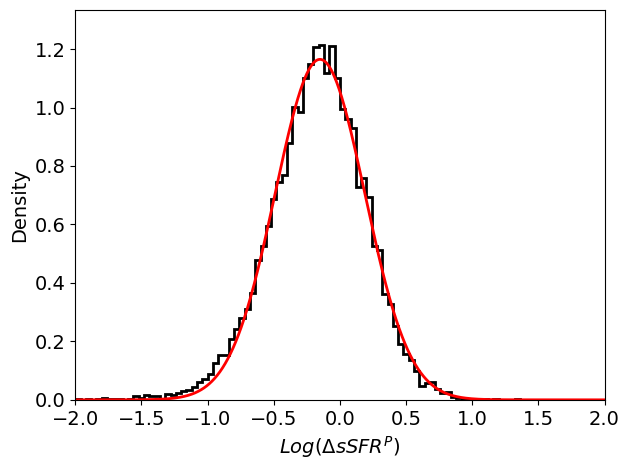

In [30]:
plot_subs_sSFR_gfit()

In [25]:
def compute_taylor_hist_gfit():

    import numpy as np
    import matplotlib.pyplot as plt
    from astropy.table import unique, Table
    import gfit
    
    galaxies_res = Table.read('results_joined_all_taylor.fitsvac', format ='fits', memmap = True)
    galaxies_res = galaxies_res[(galaxies_res['jplus.rSDSS']<=20.)&(galaxies_res['redshift']<0.20)]
    print(len(galaxies_res))

    data= galaxies_res['Log_stellar_mass_sun_Taylor_bayes'] - np.log10(galaxies_res['bayes.stellar.m_star'])
    gf = gfit.gfit()
    print(np.array(data.data))
    stellarmass = np.array(data.data)
    gf.gfit(stellarmass,nbin = 100, xlabel = '\Delta M_{T}', plot=1, xmin = -0.3, xmax = 0.3)
    
    plt.xticks(fontsize = 16)
    plt.xlabel('$Log(\Delta M^{T})$', fontsize = 20)
    plt.yticks(fontsize = 16)
    plt.ylabel('Density',fontsize = 20)
    plt.tight_layout()
    plt.savefig('histogram_subs_logs_M_stellar_taylor_gfit.png',format = 'png',dpi =200, transparent=True, facecolor='white')
   # With plot = 0, only the fit is performed
  

In [26]:
compute_taylor_hist_gfit()

848566
[-0.11451587 -0.11482528 -0.08434404 ... -0.05990319 -0.03448098
 -0.11432206]
mu = -0.076878; sigma = 0.027735; C = 13.527522


In [23]:
def plot_subs_stellar_mass_gfit():
    from scipy.stats import norm 
    import gfit
    gal =Table.read('crossmatch_puertas_jplus.fits',format ='fits', memmap = True)
    gal = gal[(gal['jplus.rSDSS']<=20.)&(gal['redshift']<0.20)]
    gal = gal[gal['Star_Forming']==1.0]
    print(len(gal))
#     if flag==0.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr100Myrs'].data)
#     elif flag==1.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr10Myrs'].data)
#     elif flag==2.:
#         SFR_jplus=np.log10(gal['bayes.sfh.sfr'].data)
    mass_jplus = np.log10(gal['bayes.stellar.m_star'])
    mass_SDSS = gal['logSFR_SDSS']+np.log10(0.943)-gal['logsSFR_SDSS']+9 #+0.04 #Kroupa first, then
    data= mass_SDSS - mass_jplus
    gf = gfit.gfit()
    print(np.array(data.data))
    stellarmass = np.array(data.data)
    gf.gfit(data,nbin = 100, xlabel = '\Delta M', plot=1, xmin = -1.5, xmax = 1.5)
    plt.xticks(fontsize = 14)
    plt.xlabel('$Log(\Delta M^{P})$',fontsize =14)
    plt.yticks(fontsize = 14)
    plt.ylabel('Density',fontsize = 14)
    plt.tight_layout()
    plt.savefig('histogram_subs_logs_M_stellar_Puertas_gfit.png',format = 'png',dpi =200, transparent=True, facecolor='white')
#     np.savetxt('stellar_mass_difference_log.txt', data[~np.isnan(data)], fmt='%.8f')
    #print(data.data)

14063
[-0.67211347  0.16767508  0.04042927 ...  1.25913395  0.42588721
  0.35706469]
mu = 0.134065; sigma = 0.195214; C = 1.847795


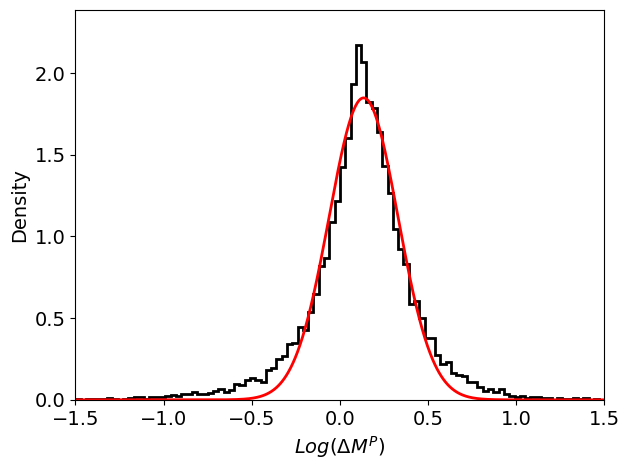

In [24]:
plot_subs_stellar_mass_gfit()

In [21]:
def plot_subs_sfr_gfit(flag):
    from scipy.stats import norm 
    import gfit
    
    gal =Table.read('crossmatch_puertas_jplus.fits',format ='fits', memmap = True)
    gal = gal[(gal['jplus.rSDSS']<=20.)&(gal['redshift']<0.20)]
    
    gal = gal[gal['Star_Forming']==1.0]
    if flag==0.:
        SFR_jplus=np.log10(gal['bayes.sfh.sfr100Myrs'].data)
    elif flag==1.:
        SFR_jplus=np.log10(gal['bayes.sfh.sfr10Myrs'].data)
    elif flag==2.:
        SFR_jplus=np.log10(gal['bayes.sfh.sfr'].data)
    
    data= gal['logSFR_SDSS']+np.log10(0.943) - SFR_jplus
    gf = gfit.gfit()
    print(np.array(data.data))
    stellarmass = np.array(data.data)
    gf.gfit(stellarmass,nbin = 100, xlabel = '\Delta SFR', plot=1, xmin = -2.5, xmax = 2.5)
    
    #plt.legend()
    #'%f*x%f'%(a_fit,b_fit)
    plt.xticks(fontsize = 14)
    plt.xlabel('$Log(\Delta SFR^{P})$',fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylabel('Density',fontsize = 14)
    plt.tight_layout()
    plt.savefig('histogram_subs_logs_SFR_Puertas_gfit.png',format = 'png', transparent=True,dpi =200, facecolor='white')
    #np.savetxt('SFR_difference_log.txt', data[~np.isnan(data)], fmt='%.8f')

In [22]:
plot_subs_sfr_gfit(1.0)

[-1.16705686  0.49573248 -0.53484174 ...  0.76502999 -0.7585775
 -0.40937449]
mu = -0.012327; sigma = 0.435078; C = 0.878757


In [39]:
def plot_subs_redshift_gfit():
    import gfit
    from scipy.stats import norm 
    gal =Table.read('crossmatch_puertas_jplus.fits',format ='fits', memmap = True)
    #print(gal.colnames)
    gal = gal[(gal['jplus.rSDSS']<=20.)&(gal['redshift']<0.20)]
    data =(gal['redshift']-gal['z_SDSS'])/(1+gal['z_SDSS'])
    gf = gfit.gfit()
    #print(np.array(data.data))
    #stellarmass = np.array(data.data)
    gf.gfit(data,nbin = 100, xlabel = '\Delta z', plot=1, xmin = -0.15, xmax = 0.15)
    #plt.legend()
    #'%f*x%f'%(a_fit,b_fit)
    
    plt.axvline(x=0, color ='black',ls ='--')
    plt.xticks(fontsize = 14)
    plt.xlabel('$\Delta z$',fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.ylabel('Density',fontsize = 14)
    plt.tight_layout()
    plt.savefig('histogram_subs_redshift_Puertas_gfit.png',format = 'png', transparent=True,dpi =200, facecolor='white')
    #np.savetxt('SFR_difference_log.txt', data[~np.isnan(data)], fmt='%.8f')

In [40]:
plot_subs_redshift_gfit()

mu = -0.003456; sigma = 0.015679; C = 21.006199


Let's separte Taylor equation by population

In [5]:
def compute_taylor_2():
    import matplotlib.pyplot as plt
    import numpy as np
    import astropy.units as u
    from astropy.coordinates import SkyCoord
    from astropy.cosmology import WMAP9 as cosmo
    from astropy.coordinates import Angle, Latitude, Longitude  # Angles
    from matplotlib import gridspec
    from astropy.table import Table
    from astropy.io import fits
    from astropy.wcs import WCS
    from scipy.optimize import curve_fit
    from astropy.table import vstack
    import pandas as pd
    from astropy.table import unique, Table
    
    galaxies_res = Table.read('results_joined_all_taylor.fitsvac', format ='fits', memmap = True)
    #for quiescents
    galaxies_res['stellar_mass_taylor_separation_pop'] = 1.02+
    0.84*(galaxies_res['bayes.jplus.gSDSS']-galaxies_res['bayes.jplus.gSDSS'])+
                            np.log10(galaxies_res['bayes.param.restframe_Lnu(jplus.iSDSS)'])
    #for starforming galaxies
    galaxies_res['stellar_mass_taylor_separation_pop'] = +1.411+0.212*(galaxies_res['bayes.jplus.gSDSS']-galaxies_res['bayes.jplus.gSDSS'])+
                                    +0.144*(galaxies_res['bayes.jplus.gSDSS']-galaxies_res['bayes.jplus.gSDSS'])**2
    
                +
                           + np.log10(galaxies_res['bayes.param.restframe_Lnu(jplus.iSDSS)'])
    
    galaxies_res.write('results_joined_all_taylor.fitsvac',format ='fits',overwrite = True)

In [6]:
compute_taylor_2()

['id', 'bayes.attenuation.V_B90', 'bayes.attenuation.V_B90_err', 'bayes.attenuation.jplus.gSDSS', 'bayes.attenuation.jplus.gSDSS_err', 'bayes.attenuation.jplus.rSDSS', 'bayes.attenuation.jplus.rSDSS_err', 'bayes.param.restframe_FUV-NUV', 'bayes.param.restframe_FUV-NUV_err', 'bayes.param.restframe_FUV-V_apellaniz', 'bayes.param.restframe_FUV-V_apellaniz_err', 'bayes.param.restframe_NUV-r_prime', 'bayes.param.restframe_NUV-r_prime_err', 'bayes.param.restframe_U_apellaniz-V_apellaniz', 'bayes.param.restframe_U_apellaniz-V_apellaniz_err', 'bayes.param.restframe_V_apellaniz-J_2mass', 'bayes.param.restframe_V_apellaniz-J_2mass_err', 'bayes.param.restframe_jplus.gSDSS-jplus.iSDSS', 'bayes.param.restframe_jplus.gSDSS-jplus.iSDSS_err', 'bayes.param.restframe_Lnu(FUV)', 'bayes.param.restframe_Lnu(FUV)_err', 'bayes.param.restframe_Lnu(V_B90)', 'bayes.param.restframe_Lnu(V_B90)_err', 'bayes.param.restframe_Lnu(jplus.gSDSS)', 'bayes.param.restframe_Lnu(jplus.gSDSS)_err', 'bayes.param.restframe_Lnu(

In [34]:
def compute_taylor_2():
    import numpy as np
    from astropy.table import Table

    # Load the FITS file using memmap for efficiency
    galaxies_res = Table.read('results_joined_all_taylor.fitsvac', format='fits', memmap=True)

    # Boolean masks for galaxy types
    sf_mask = galaxies_res['Star_Forming'] == 1
    q_mask = galaxies_res['Star_Forming'] == 0

    # Preallocate the column with NaNs (or zeros if more appropriate)
    stellar_mass = np.full(len(galaxies_res), np.nan)

    # Compute for quiescent galaxies
    color = galaxies_res['bayes.jplus.gSDSS'] - galaxies_res['bayes.jplus.iSDSS']
    logL = np.log10(galaxies_res['bayes.param.restframe_Lnu(jplus.iSDSS)'])

    stellar_mass[q_mask] = (
        1.02 +
        0.84 * color[q_mask] +
        logL[q_mask]
    )

    # Compute for star-forming galaxies
    stellar_mass[sf_mask] = (
        1.411 +
        0.212 * color[sf_mask] +
        0.144 * color[sf_mask] ** 2 +
        logL[sf_mask]
    )

    # Save to the table
    galaxies_res['stellar_mass_taylor_separation_pop'] = stellar_mass

    # Write the result
    galaxies_res.write('results_joined_all_taylor.fitsvac', format='fits', overwrite=True)


In [35]:
compute_taylor_2()

In [23]:
def compute_taylor_3():
    import numpy as np
    from astropy.table import Table

    # Load the FITS file using memmap for efficiency
    galaxies_res = Table.read('results_joined_all_taylor.fitsvac', format='fits', memmap=True)

    # Boolean masks for galaxy types
    sf_mask = galaxies_res['Star_Forming'] == 1
    q_mask = galaxies_res['Star_Forming'] == 0

    # Preallocate the column with NaNs (or zeros if more appropriate)
    stellar_mass = np.full(len(galaxies_res), np.nan)

    # Compute for quiescent galaxies
    color = galaxies_res['bayes.param.restframe_jplus.gSDSS-jplus.iSDSS']
    #logL = np.log10(galaxies_res['bayes.param.restframe_Lnu(jplus.iSDSS)'])
    flux_bayes =(10000000*galaxies_res['bayes.param.restframe_Lnu(jplus.iSDSS)'])/(4*np.pi*(10*3085680479993550000)**2) #Convert from luminosity to flux
    #logL = np.log10(L)
    #     #flux_best = (10000000*Data['best.param.restframe_Lnu(jplus.iSDSS)'])/(4*np.pi*(10*3085680479993550000)**2) # Convert from luminosity to flux
    Mi_bayes = -2.5*np.log10(flux_bayes) - 48.60
#     Mi_best = -2.5*np.log10(flux_best) - 48.60
#     Data['Log_stellar_mass_sun_Taylor_bayes'] = 1.15 +0.70*(Data['bayes.param.restframe_jplus.gSDSS-jplus.iSDSS']) - 0.4*(Mi_bayes)
#     Data['Log_stellar_mass_sun_Taylor_best'] = 1.15 +0.70*(Data['best.param.restframe_jplus.gSDSS-jplus.iSDSS']) - 0.4*(Mi_best)
    
    
    
    
    

    stellar_mass[q_mask] = (
        1.02 +
        0.84 * color[q_mask]-0.4*Mi_bayes[q_mask]
    )

    # Compute for star-forming galaxies
    stellar_mass[sf_mask] = (
        1.411 +
        0.212 * color[sf_mask] +
        0.144 * color[sf_mask] ** 2 -0.4*Mi_bayes[sf_mask]
    )

    # Save to the table
    galaxies_res['stellar_mass_taylor_separation_pop'] = stellar_mass

    # Write the result
    galaxies_res.write('results_joined_all_taylor.fitsvac', format='fits', overwrite=True)


In [24]:
compute_taylor_3()

In [19]:
def compute_taylor_hist_gfit():
    import numpy as np
    import matplotlib.pyplot as plt
    from astropy.table import Table
    import gfit

    # Read and filter data
    galaxies_res = Table.read('results_joined_all_taylor.fitsvac', format='fits', memmap=True)
    galaxies_res = galaxies_res[(galaxies_res['jplus.rSDSS'] <= 20.) & (galaxies_res['redshift'] < 0.20)]
    print("Total galaxies after cut:", len(galaxies_res))

    # Split populations
    sf_mask = galaxies_res['Star_Forming'] == 1
    q_mask = galaxies_res['Star_Forming'] == 0

    # Prepare the figure
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    # Star-forming galaxies
    delta_mass_sf = galaxies_res['stellar_mass_taylor_separation_pop'][sf_mask] - np.log10(galaxies_res['bayes.stellar.m_star'][sf_mask])
    gf_sf = gfit.gfit()
    gf_sf.gfit(np.array(delta_mass_sf.data), nbin=100, xlabel=r'\Delta M_{T}', plot=1, xmin=-0.3, xmax=0.3)

    axes[0].set_title('Star-Forming', fontsize=14)
    axes[0].set_xlabel(r'$\Delta M_{T}$', fontsize=14)
    axes[0].set_ylabel('Density', fontsize=14)
    axes[0].tick_params(labelsize=12)

    # Quiescent galaxies
    delta_mass_q = galaxies_res['stellar_mass_taylor_separation_pop'][q_mask] - np.log10(galaxies_res['bayes.stellar.m_star'][q_mask])
    gf_q = gfit.gfit()
    gf_q.gfit(np.array(delta_mass_q.data), nbin=100, xlabel=r'\Delta M_{T}', plot=1, xmin=-0.3, xmax=0.3)

    axes[1].set_title('Quiescent', fontsize=14)
    axes[1].set_xlabel(r'$\Delta M_{T}$', fontsize=14)
    axes[1].tick_params(labelsize=12)

    # Layout and save
    plt.tight_layout()
    plt.savefig('histogram_subs_logs_M_stellar_taylor_gfit_split.png',
                format='png', dpi=200, transparent=True, facecolor='white')


Total galaxies after cut: 848566
mu = -0.297000; sigma = 0.001500; C = 0.000000
mu = -0.297000; sigma = 0.001500; C = 0.000000


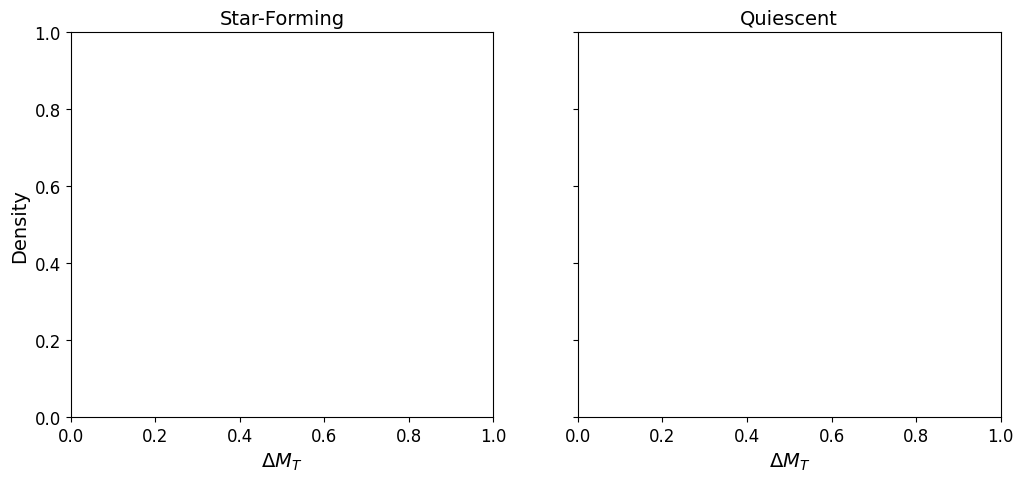

In [20]:
compute_taylor_hist_gfit()

In [35]:
def compute_taylor_hist_gfit_sf():
    import numpy as np
    import matplotlib.pyplot as plt
    from astropy.table import Table
    import gfit

    # Read and filter data
    galaxies_res = Table.read('results_joined_all_taylor.fitsvac', format='fits', memmap=True)
    galaxies_res = galaxies_res[(galaxies_res['jplus.rSDSS'] <= 20.) & (galaxies_res['redshift'] < 0.20)]
    #print("Total galaxies after cut:", len(galaxies_res))

    # Split populations
    sf_mask = galaxies_res['Star_Forming'] == 1
    #q_mask = galaxies_res['Star_Forming'] == 0



    # Star-forming galaxies
    delta_mass_sf = galaxies_res['stellar_mass_taylor_separation_pop'][sf_mask] - np.log10(galaxies_res['bayes.stellar.m_star'][sf_mask])
    #print(galaxies_res.colnames)
    #print(galaxies_res['stellar_mass_taylor_separation_pop'])
    #plt.hist(galaxies_res['Star_Forming'], bins ='auto')
    gf = gfit.gfit()
    gf.gfit(delta_mass_sf, nbin=100, xlabel=r'\Delta M_{T}', plot=1, xmin=-0.4, xmax=0.4)
    plt.axvline(x=0, color ='black',ls ='--')
    plt.xticks(fontsize = 16)
    plt.xlabel('$Log(\Delta M_{SF}^{L})$', fontsize = 20)
    plt.yticks(fontsize = 16)
    plt.ylabel('Density',fontsize = 20)
    plt.tight_layout()
    plt.savefig('histogram_clsj_sf_taylor.png',format = 'png',dpi =200, transparent=True, facecolor='white')
   # With plot = 0, only the fit is performed

mu = -0.054005; sigma = 0.096323; C = 4.182164


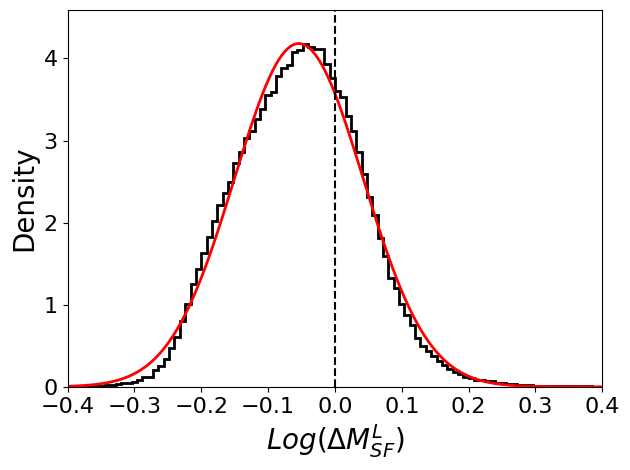

In [36]:
compute_taylor_hist_gfit_sf()

In [33]:
def compute_taylor_hist_gfit_q():
    import numpy as np
    import matplotlib.pyplot as plt
    from astropy.table import Table
    import gfit

    # Read and filter data
    galaxies_res = Table.read('results_joined_all_taylor.fitsvac', format='fits', memmap=True)
    galaxies_res = galaxies_res[(galaxies_res['jplus.rSDSS'] <= 20.) & (galaxies_res['redshift'] < 0.20)]
    #print("Total galaxies after cut:", len(galaxies_res))

    # Split populations
    #sf_mask = galaxies_res['Star_Forming'] == 1
    q_mask = galaxies_res['Star_Forming'] == 0



    # Star-forming galaxies
    delta_mass_sf = galaxies_res['stellar_mass_taylor_separation_pop'][q_mask] - np.log10(galaxies_res['bayes.stellar.m_star'][q_mask])
    #print(galaxies_res.colnames)
    #print(galaxies_res['stellar_mass_taylor_separation_pop'])
    #plt.hist(galaxies_res['Star_Forming'], bins ='auto')
    gf = gfit.gfit()
    gf.gfit(delta_mass_sf, nbin=100, xlabel=r'\Delta M_{T}', plot=1, xmin=-0.4, xmax=0.4)
    plt.axvline(x=0, color ='black',ls ='--')
    plt.xticks(fontsize = 16)
    plt.xlabel('$Log(\Delta M_{Q}^{L})$', fontsize = 20)
    plt.yticks(fontsize = 16)
    plt.ylabel('Density',fontsize = 20)#
    plt.tight_layout()
    plt.savefig('histogram_clsj_q_taylor.png',format = 'png',dpi =200, transparent=True, facecolor='white')
   # With plot = 0, only the fit is performed

mu = -0.063765; sigma = 0.016312; C = 24.179868


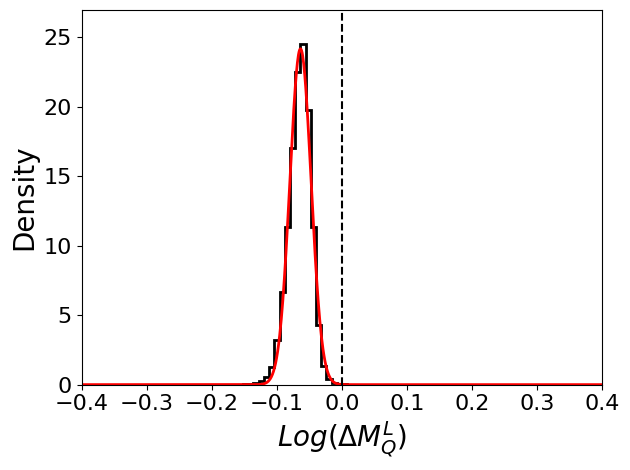

In [34]:
compute_taylor_hist_gfit_q()